## Analyse und Auswertung der modellierten Textzeugen und der extrahierten Textstufen 

In [127]:
import lxml
from lxml import etree
import pandas as pd
import re
import os
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
ns = {"t": "http://www.tei-c.org/ns/1.0"}
xml = "{http://www.w3.org/XML/1998/namespace}"

In [2]:
tree = etree.parse("C:/Users/jO/Desktop/DH_MA_Arbeit/coding/extrahiert_vwdazb - Kopie.xml")

### Auswertung der Eingriffe und Revisionen in den Textzeugen.
Alle divs mit type="witness" und einer xml:id im xml werden untersucht.

Erfassung und Auswertung aller vorhandenen Tags, deren Attribute und Values sowie den einzelnen Kombinationen. 

In [316]:
# Erfassung aller vorhandenen Tags
def extractallinterferences(poem, divs):
    foldername = f"{poem}_revisioninterferences_csvs" # Foldername mit Poemname bestimmen
    os.makedirs(f"C:/Users/jO/Desktop/DH_MA_Arbeit/coding/{foldername}") # Folder kreiern

    # seaborn Farbenpalette für Visualisierung
    sns.set_style("whitegrid")
    palette = "Set2"
    
    for div in divs: # pro div einen divname kreieren
        divtype = div.attrib.get('type')
        divid = div.attrib.get(f'{xml}id')
        divname = f"{divtype}_{divid}"
        print(divname)
    
        allcombinations = tree.xpath(f"//t:div[@type='{divtype}' and @xml:id='{divid}']//t:l//@* | //t:div[@type='{divtype}' and @xml:id='{divid}']//t:l//*", namespaces=ns) # alle Tags und Attribute herausnehmen
        
        allcombinations_list = [] # Liste für alle Tag-Attribute-Value-Kombinationen
        
        for element in allcombinations: 
            if isinstance(element, etree._Element):  # ist es ein Tag, dann wird es normalisiert
                elementname = etree.QName(element).localname
                
                for attr_name, attr_value in element.attrib.items():  # pro element/tag wird der attributname und attributwert geholt 
                    allcombinations_list.append((elementname, attr_name, attr_value)) # Kombinationen

    
        alltags = tree.xpath(f"//t:div[@type='{divtype}' and @xml:id='{divid}']//t:l//*", namespaces=ns) # alle Tags
            
        alltags_list = [] # Liste nur für die Tags/Elemente
        onlyattr_list = [] # Liste nur für die Attribute
        onlyval_list = [] # Liste nur für die Attributevalues
    
        for element in alltags: 
            if isinstance(element, etree._Element):  # ist es ein Tag, dann wird es normalisiert
                elementname = etree.QName(element).localname
                alltags_list.append(elementname) # nur Tag/Element

                for attr_name, attr_value in element.attrib.items():  # pro element/tag wird der attributname und attributwert geholt 
                    onlyattr_list.append(attr_name) # nur Attribute
                    onlyval_list.append(attr_value) # nur Values

        # KOMBINATIONEN
        allcombinations_counter = f"allattributes_counter_{divname}" # Countername pro div und allattributes-Liste (Tag-Attribute-Value) erstellen
        allcombinations_counter = Counter(allcombinations_list)
        
        df = f"allcombinations_{divname}" # df für das div mit den Tags erstellen
        df = pd.DataFrame.from_dict(allcombinations_counter, orient='index').reset_index()
        df = df.rename(columns={'index':'tag - attribute - value', 0:'count'})
        df.to_csv(f'{foldername}/allcombinations_{divname}_df.csv', index=False)
        print(df)

        # VISUALISIERUNG
        ax = df.plot(x='tag - attribute - value', y='count', kind='bar', color=sns.color_palette(palette), figsize=(8, 4))
        plt.xlabel('Kombinationen')
        plt.ylabel('Häufigkeit')
        plt.title(f'Tag-Attribute-Value-Kombinationen ({divname})')
        containers = ax.containers
        plt.bar_label(containers[0], label_type='edge')
        plt.xticks(rotation=45, ha='right')
        ax.legend().set_visible(False)
        plt.tight_layout()
        plt.savefig(f'{foldername}/allcombinations_{divname}_df.png')
        plt.show()

        # stacked bar chart
        stacked_df = df.set_index('tag - attribute - value').T
        ax = stacked_df.plot(kind='bar', stacked=True, color=sns.color_palette(palette), figsize=(8, 8))
        plt.xlabel(divname)
        plt.ylabel('Häufigkeit')
        plt.title(f'Tag-Attribute-Value-Kombinationen ({divname})')
        for container in ax.containers:
            ax.bar_label(container, label_type='center')
        plt.xticks(rotation=45, ha='right')
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, bbox_to_anchor=(1, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(f'{foldername}/allcombinations_stacked_{divname}_df.png')
        plt.show()
        
        # ALLE TAGS
        alltags_counter = f"alltags_counter_{divname}"       # Countername pro div und alltags-Liste erstellen
        alltags_counter = Counter(alltags_list) # den Counter über die bereinigte Tag-Liste laufen lassen
            
        df = f"alltags_{divname}" # df für das div mit den Tags erstellen
        df = pd.DataFrame.from_dict(alltags_counter, orient='index').reset_index()
        df = df.rename(columns={'index':'tag', 0:'count'})
        df.to_csv(f'{foldername}/alltags_{divname}_df.csv', index=False)
        print(df)

         # VISUALISIERUNG
        ax = df.plot(x='tag', y='count', kind='bar', color=sns.color_palette(palette), figsize=(8, 4))
        plt.xlabel('Tags')
        plt.ylabel('Häufigkeit')
        plt.title(f'Tags ({divname})')
        containers = ax.containers
        plt.bar_label(containers[0], label_type='edge')
        plt.xticks(rotation=45, ha='right')
        ax.legend().set_visible(False)
        plt.tight_layout()
        plt.savefig(f'{foldername}/alltags_{divname}_df.png')
        plt.show()

        # stacked bar chart
        stacked_df = df.set_index('tag').T
        ax = stacked_df.plot(kind='bar', stacked=True, color=sns.color_palette(palette), figsize=(8, 8))
        plt.xlabel(divname)
        plt.ylabel('Häufigkeit')
        plt.title(f'Tags ({divname})')
        for container in ax.containers:
            ax.bar_label(container, label_type='center')
        plt.xticks(rotation=45, ha='right')
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, bbox_to_anchor=(1, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(f'{foldername}/alltags_stacked_{divname}_df.png')
        plt.show()

        # ALLE ATTRIBUTE
        onlyattributes_counter = f"onlyattributes_counter_{divname}" # Countername pro div und onlyattr-Liste erstellen
        onlyattributes_counter = Counter(onlyattr_list)
    
        df = f"onlyattributes_{divname}" # df für das div mit den Tags erstellen
        df = pd.DataFrame.from_dict(onlyattributes_counter, orient='index').reset_index()
        df = df.rename(columns={'index':'attribute', 0:'count'})
        df.to_csv(f'{foldername}/onlyattributes_{divname}_df.csv', index=False)
        print(df)

        # VISUALISIERUNG
        ax = df.plot(x='attribute', y='count', kind='bar', color=sns.color_palette(palette), figsize=(8, 4))
        plt.xlabel('Attribute')
        plt.ylabel('Häufigkeit')
        plt.title(f'Attribute ({divname})')
        containers = ax.containers
        plt.bar_label(containers[0], label_type='edge')
        plt.xticks(rotation=45, ha='right')
        ax.legend().set_visible(False)
        plt.tight_layout()
        plt.savefig(f'{foldername}/onlyattributes_{divname}_df.png')
        plt.show()

        # stacked bar chart
        stacked_df = df.set_index('attribute').T
        ax = stacked_df.plot(kind='bar', stacked=True, color=sns.color_palette(palette), figsize=(8, 8))
        plt.xlabel(divname)
        plt.ylabel('Häufigkeit')
        plt.title(f'Attribute ({divname})')
        for container in ax.containers:
            ax.bar_label(container, label_type='center')
        plt.xticks(rotation=45, ha='right')
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, bbox_to_anchor=(1, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(f'{foldername}/onlyattributes_stacked_{divname}_df.png')
        plt.show()

        # ALLE VALUES
        onlyvalues_counter = f"onlyattributes_counter_{divname}" # Countername pro div und onlyval-Liste erstellen
        onlyvalues_counter = Counter(onlyval_list)
    
        df = f"onlyvalues_{divname}" # df für das div mit den Tags erstellen
        df = pd.DataFrame.from_dict(onlyvalues_counter, orient='index').reset_index()
        df = df.rename(columns={'index':'attribute-value', 0:'count'})
        df.to_csv(f'{foldername}/onlyvalues_{divname}_df.csv', index=False)
        print(df)

        # VISUALISIERUNG
        ax = df.plot(x='attribute-value', y='count', kind='bar', color=sns.color_palette(palette), figsize=(8, 4))
        plt.xlabel('Attributwert')
        plt.ylabel('Häufigkeit')
        plt.title(f'Attributwerte ({divname})')
        containers = ax.containers
        plt.bar_label(containers[0], label_type='edge')
        plt.xticks(rotation=45, ha='right')
        ax.legend().set_visible(False)
        plt.tight_layout()
        plt.savefig(f'{foldername}/onlyvalues_{divname}_df.png')
        plt.show()

        # stacked bar chart
        stacked_df = df.set_index('attribute-value').T
        ax = stacked_df.plot(kind='bar', stacked=True, color=sns.color_palette(palette), figsize=(8, 8))
        plt.xlabel(divname)
        plt.ylabel('Häufigkeit')
        plt.title(f'Attributwerte ({divname})')
        for container in ax.containers:
            ax.bar_label(container, label_type='center')
        plt.xticks(rotation=45, ha='right')
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, bbox_to_anchor=(1, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(f'{foldername}/onlyvalues_stacked_{divname}_df.png')
        plt.show()
        
        
       # print(divname, alltags_cleaned_list, alltags_counter, allattributes_list, allattributes_counter,  onlyattributes_counter)

        


witness_nr.1
      tag - attribute - value  count
0   (add, change, #black_pen)      8
1   (del, change, #black_pen)      6
2  (del, change, #typewriter)      1
3   (reg, change, #black_pen)      1
4     (reg, type, rearranged)      1


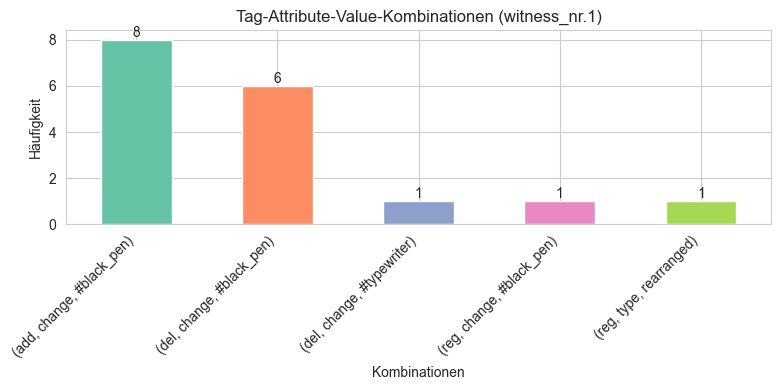

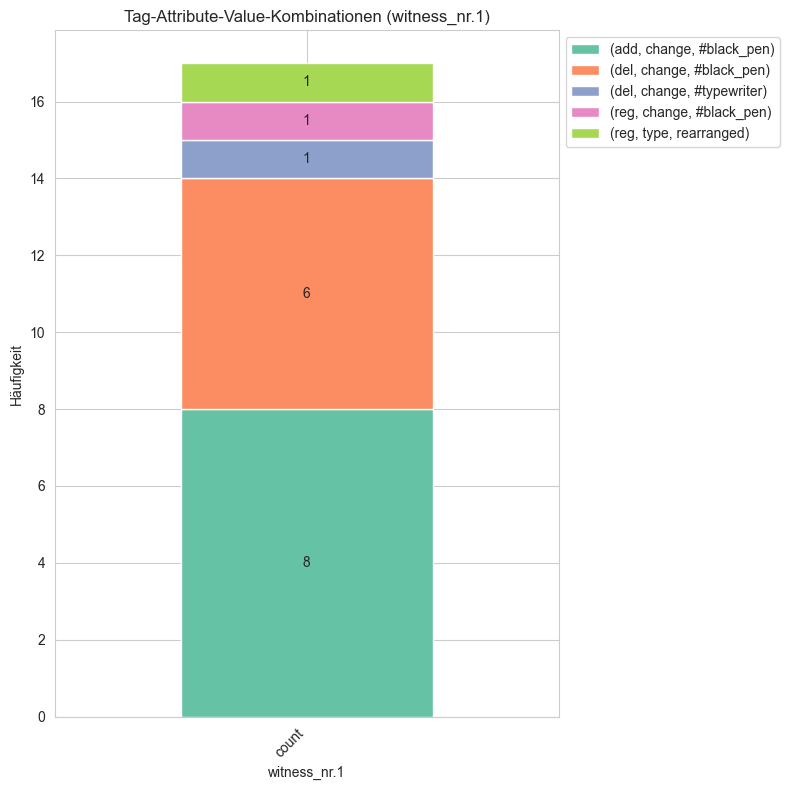

       tag  count
0      add      8
1      del      7
2   choice      1
3     orig      1
4      reg      1
5  unclear      1


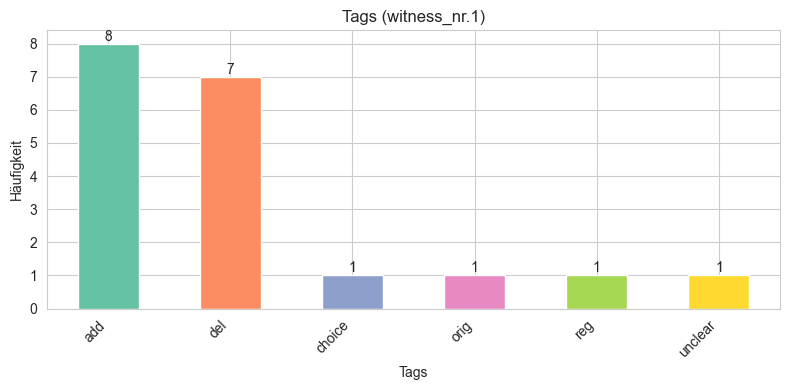

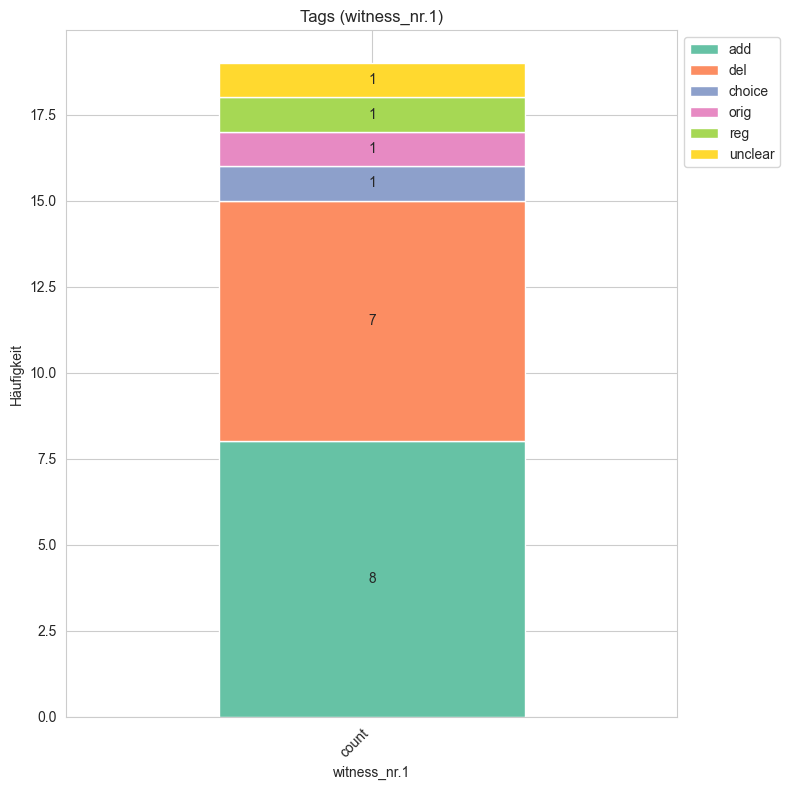

  attribute  count
0    change     16
1      type      1


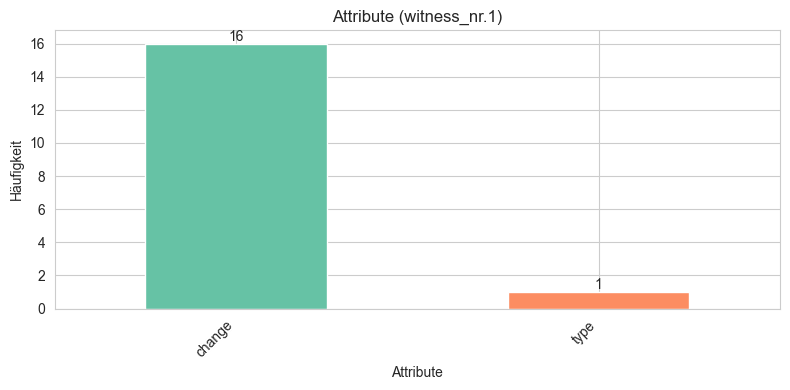

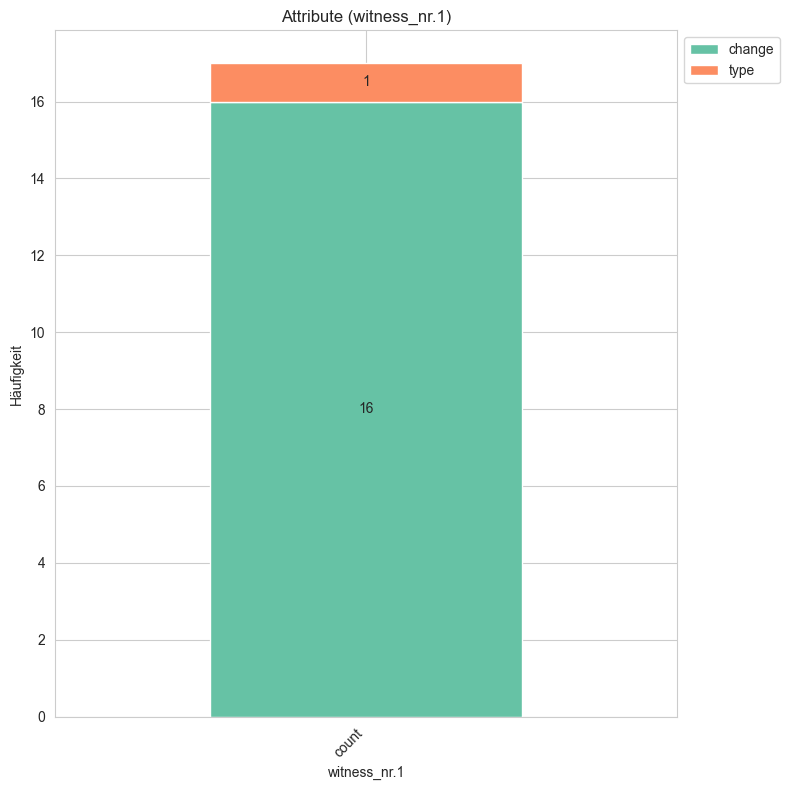

  attribute-value  count
0      #black_pen     15
1     #typewriter      1
2      rearranged      1


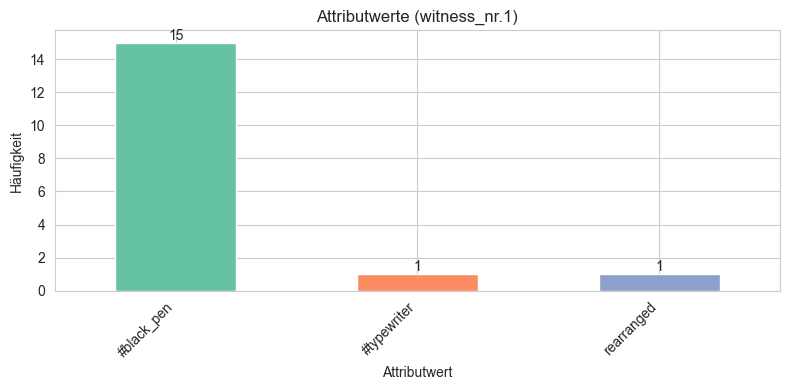

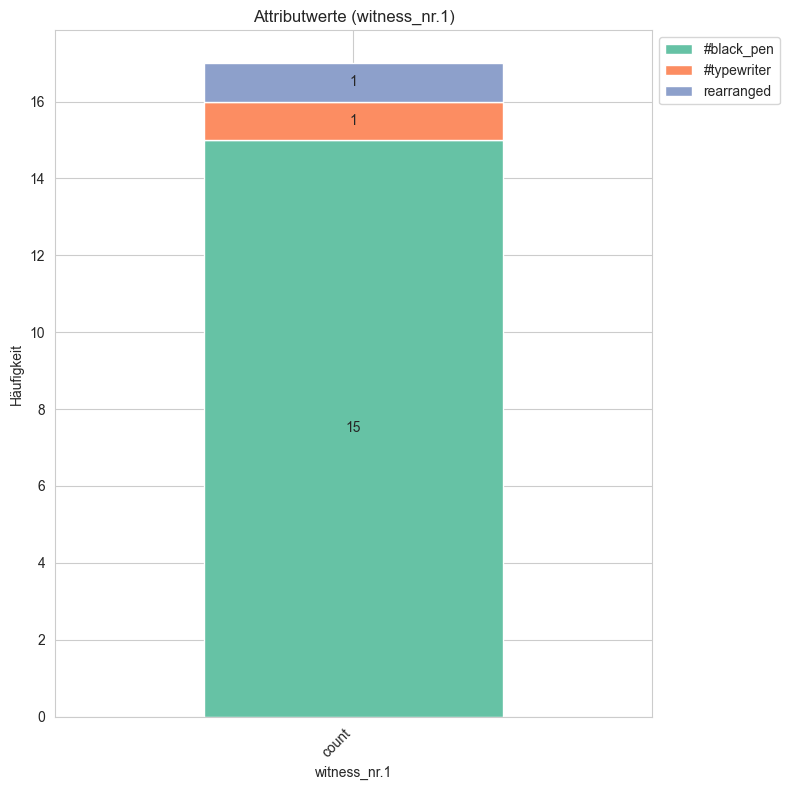

witness_nr.2
      tag - attribute - value  count
0    (del, change, #blue_pen)      8
1    (add, change, #blue_pen)      7
2  (del, change, #violet_pen)      1
3   (add, change, #black_pen)      1


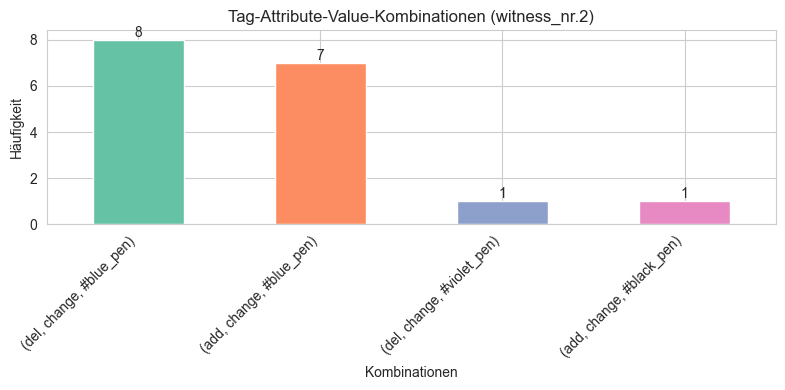

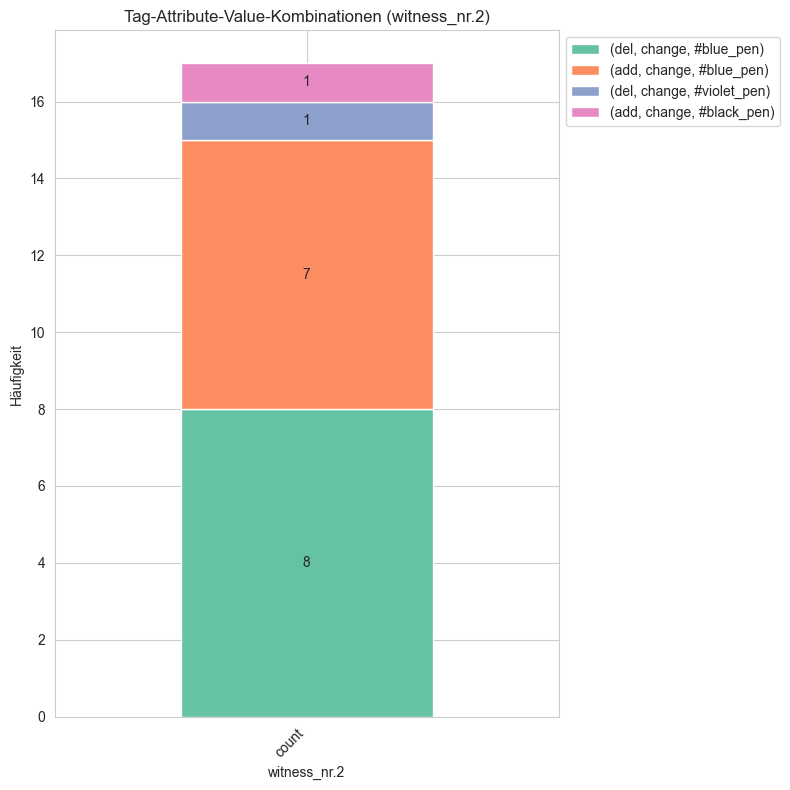

   tag  count
0  del      9
1  add      8


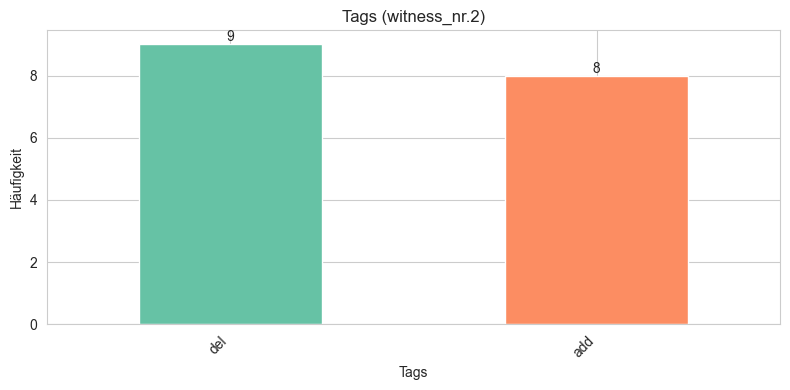

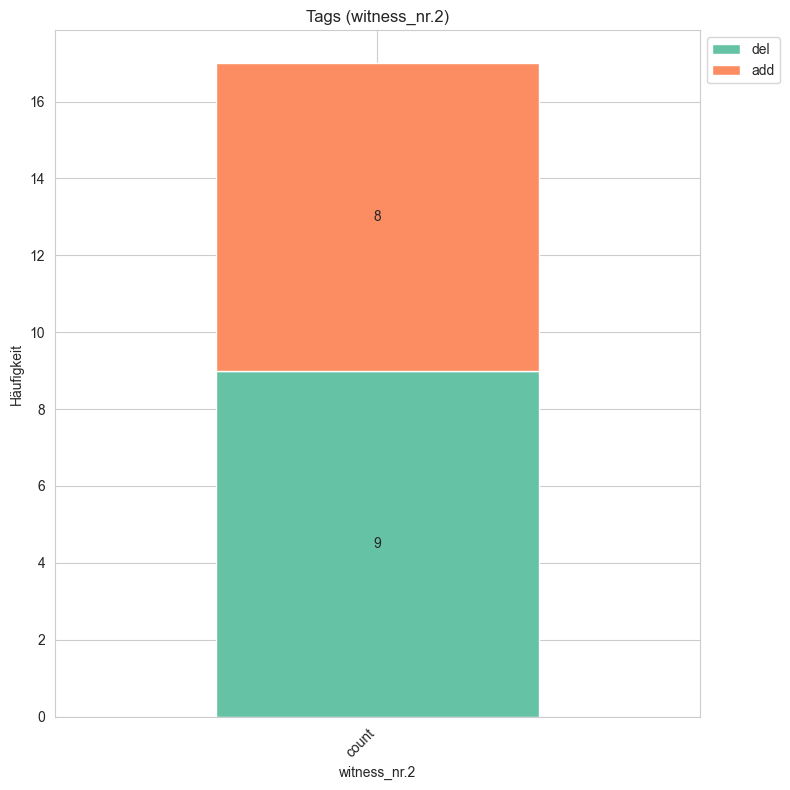

  attribute  count
0    change     17


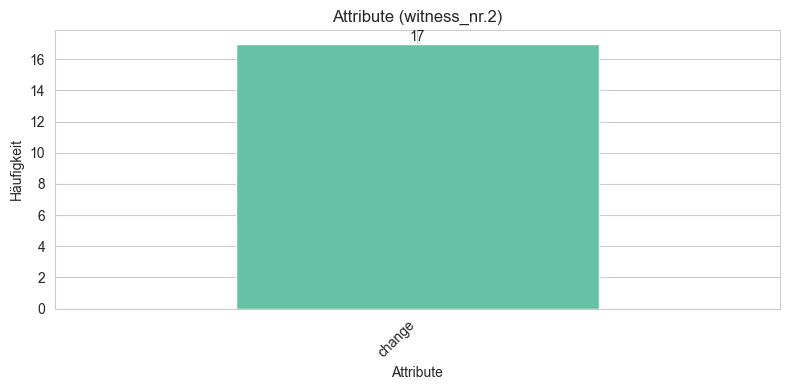

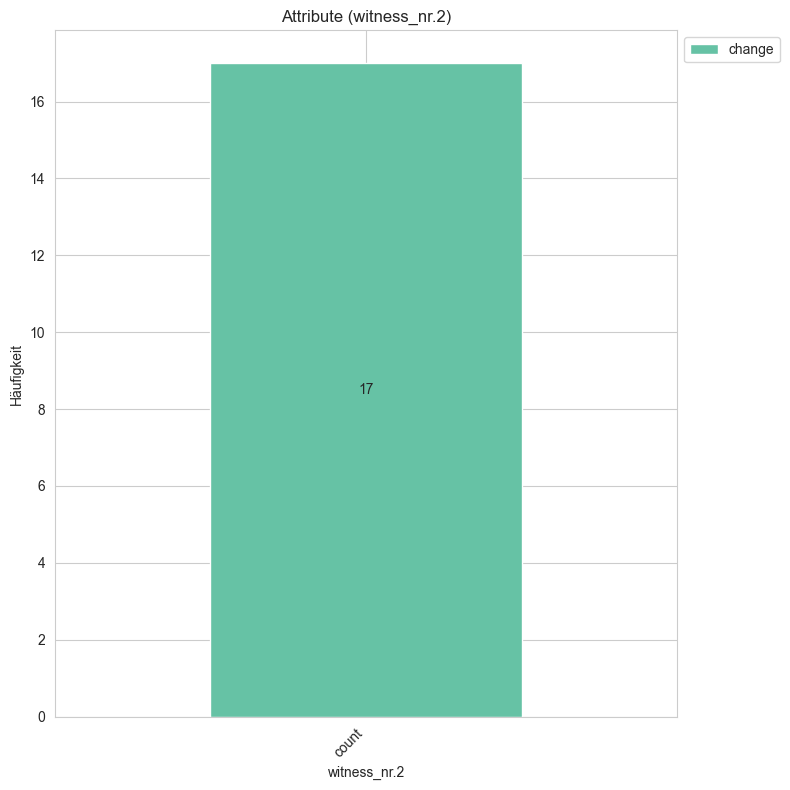

  attribute-value  count
0       #blue_pen     15
1     #violet_pen      1
2      #black_pen      1


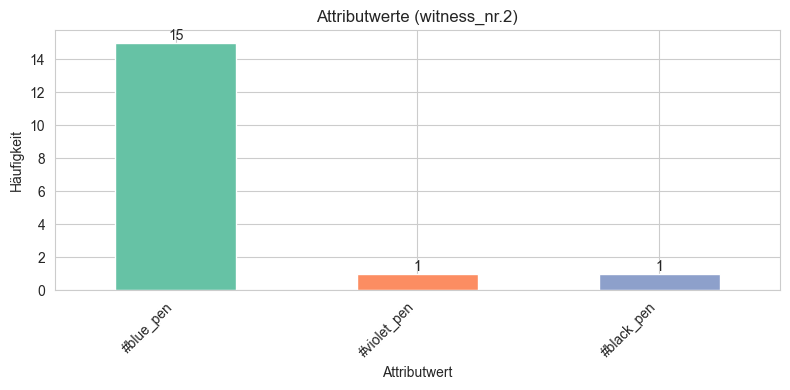

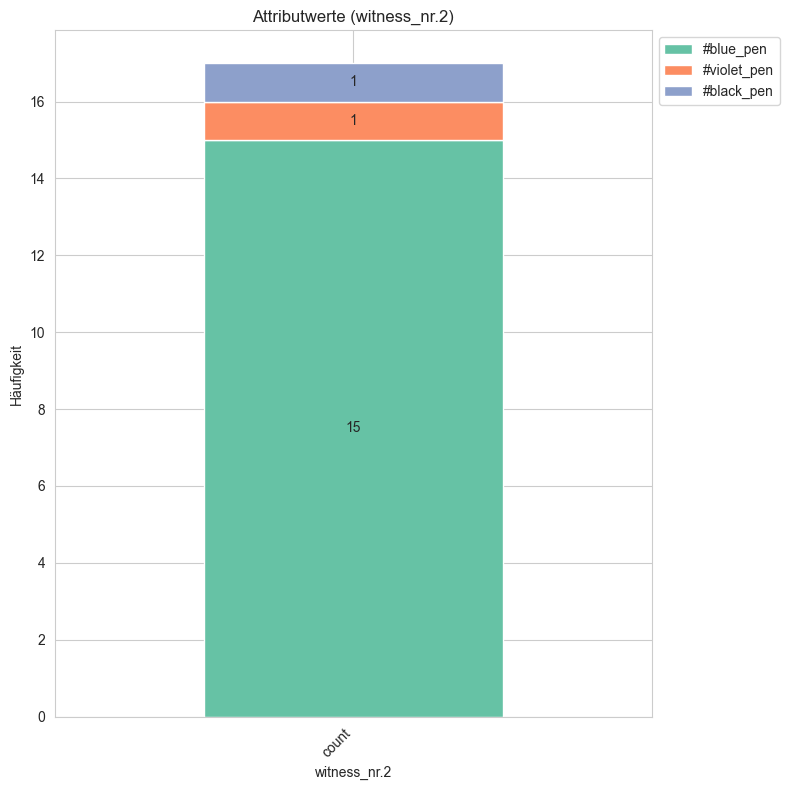

witness_nr.3
      tag - attribute - value  count
0    (add, change, #blue_pen)      6
1    (del, change, #blue_pen)      8
2   (add, change, #black_pen)      2
3   (reg, change, #green_pen)      1
4     (reg, type, rearranged)      2
5   (del, change, #black_pen)      1
6  (add, change, #typewriter)      1
7  (reg, change, #typewriter)      1
8  (del, change, #typewriter)      1


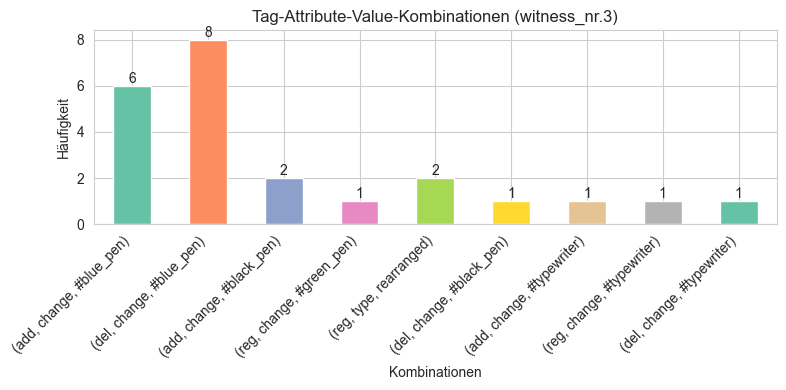

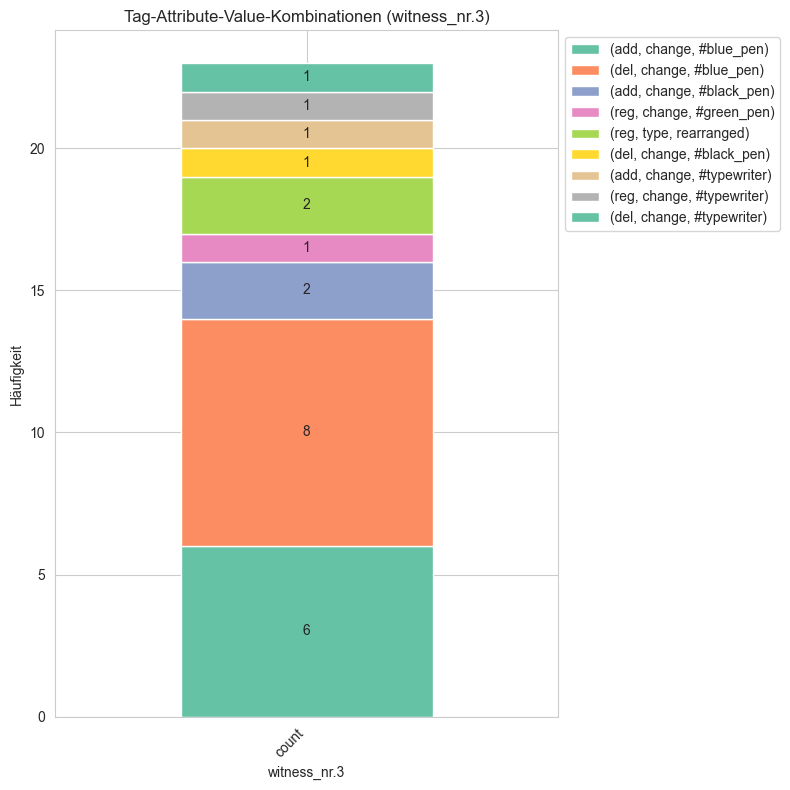

       tag  count
0      add      9
1      del     10
2  unclear      2
3   choice      2
4     orig      2
5      reg      2


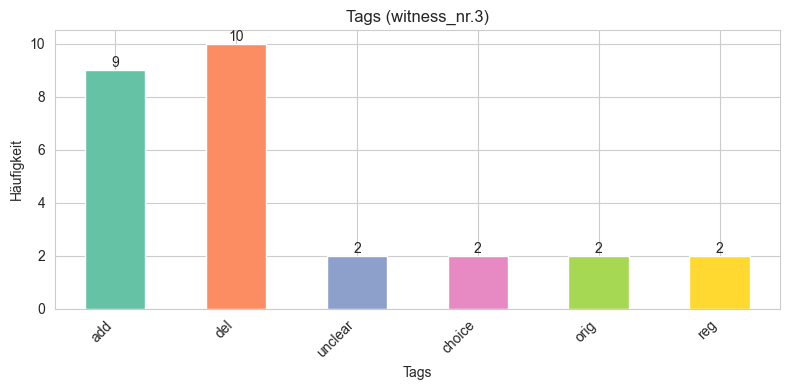

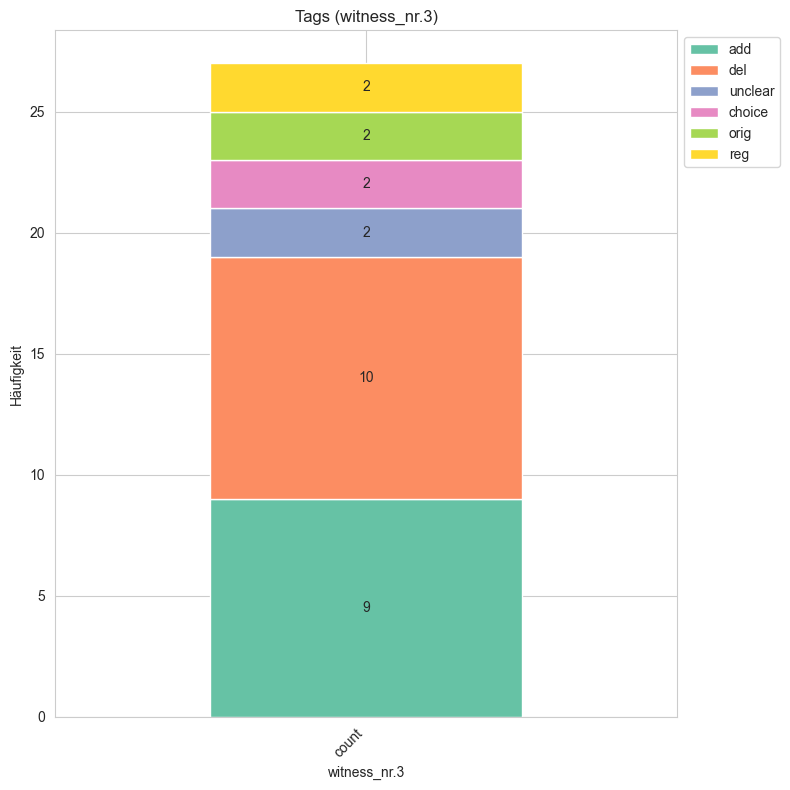

  attribute  count
0    change     21
1      type      2


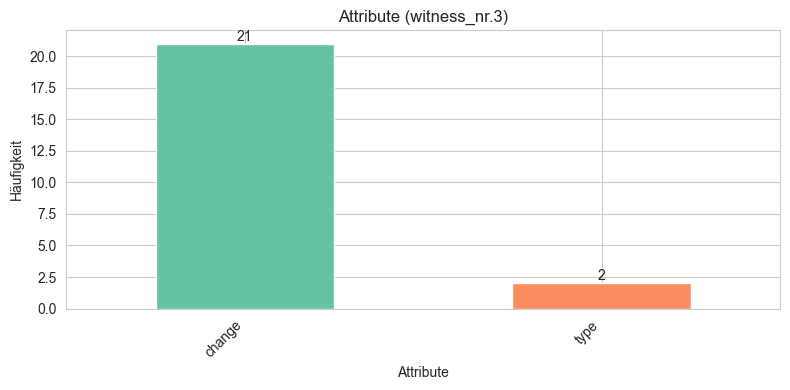

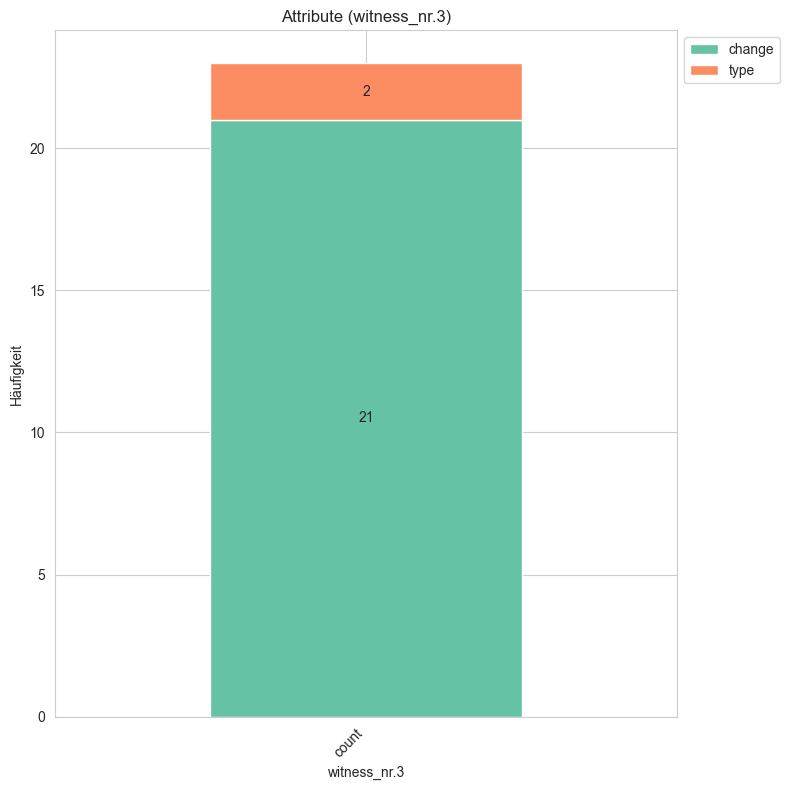

  attribute-value  count
0       #blue_pen     14
1      #black_pen      3
2      #green_pen      1
3      rearranged      2
4     #typewriter      3


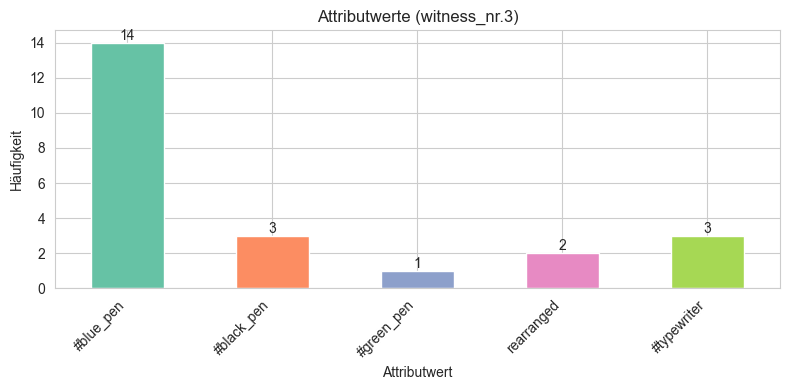

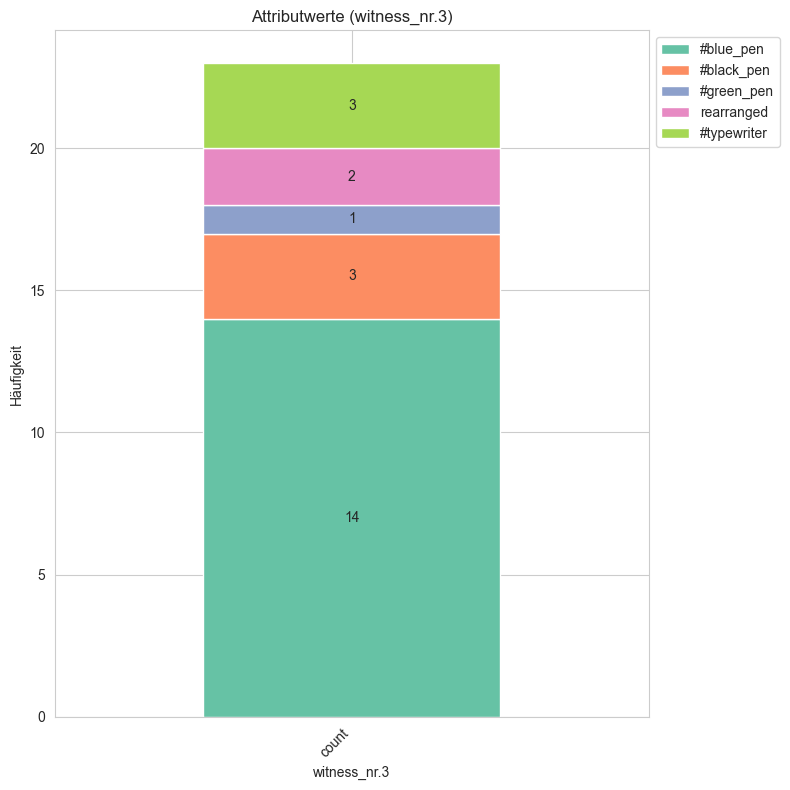

witness_nr.4
      tag - attribute - value  count
0   (del, change, #green_pen)      5
1   (add, change, #green_pen)      5
2  (orig, change, #green_pen)      1
3  (reg, change, #typewriter)      1
4       (reg, type, replaced)      1
5     (add, change, #red_pen)      1
6   (del, change, #black_pen)      2
7     (del, change, #red_pen)      1


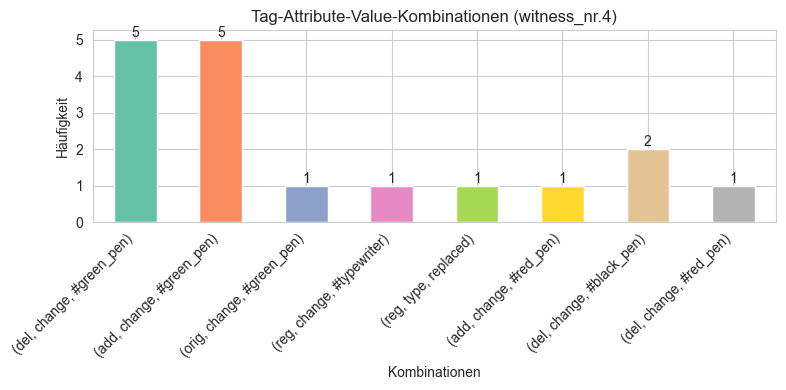

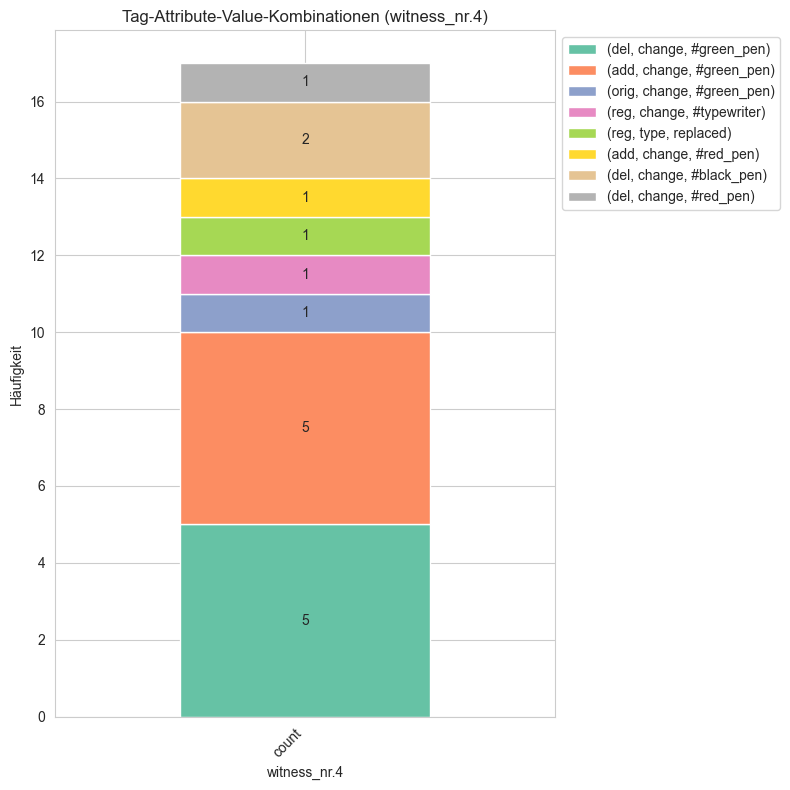

       tag  count
0      del      8
1      add      6
2   choice      1
3     orig      1
4      reg      1
5  unclear      1


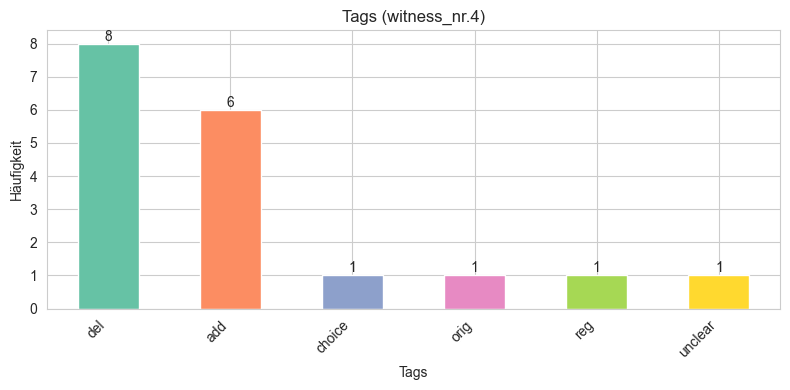

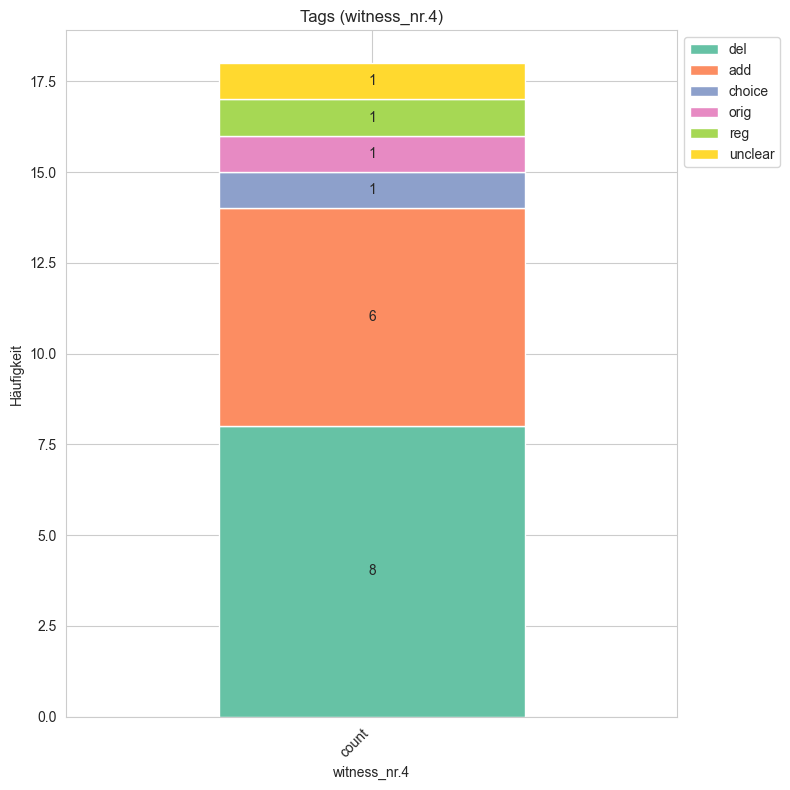

  attribute  count
0    change     16
1      type      1


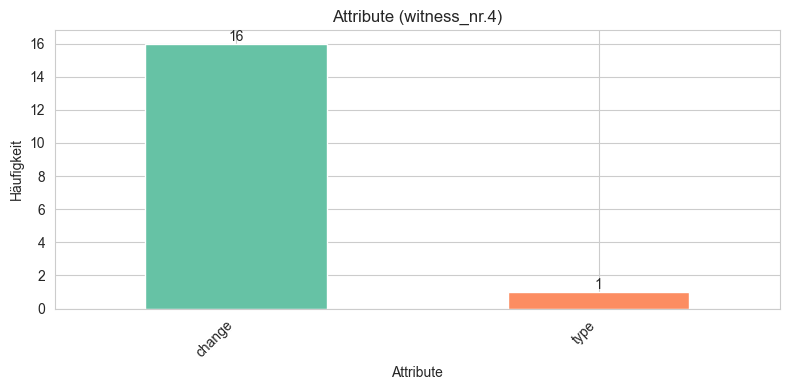

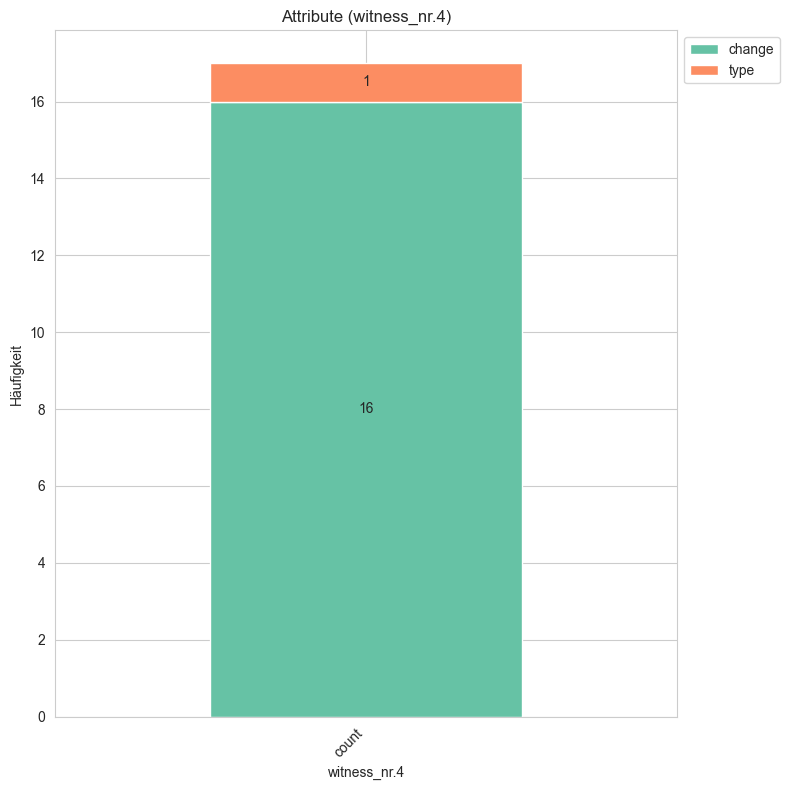

  attribute-value  count
0      #green_pen     11
1     #typewriter      1
2        replaced      1
3        #red_pen      2
4      #black_pen      2


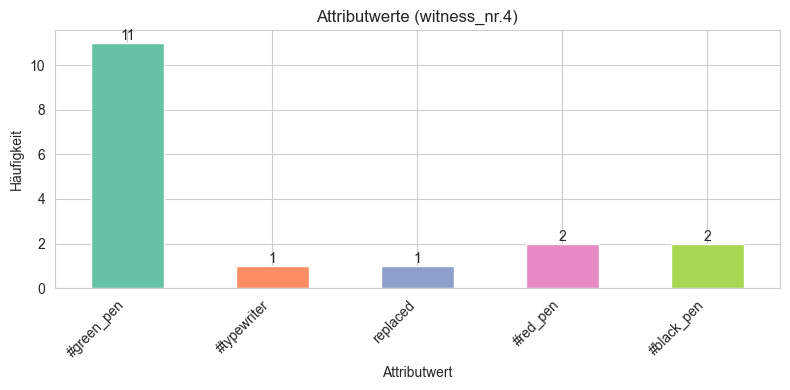

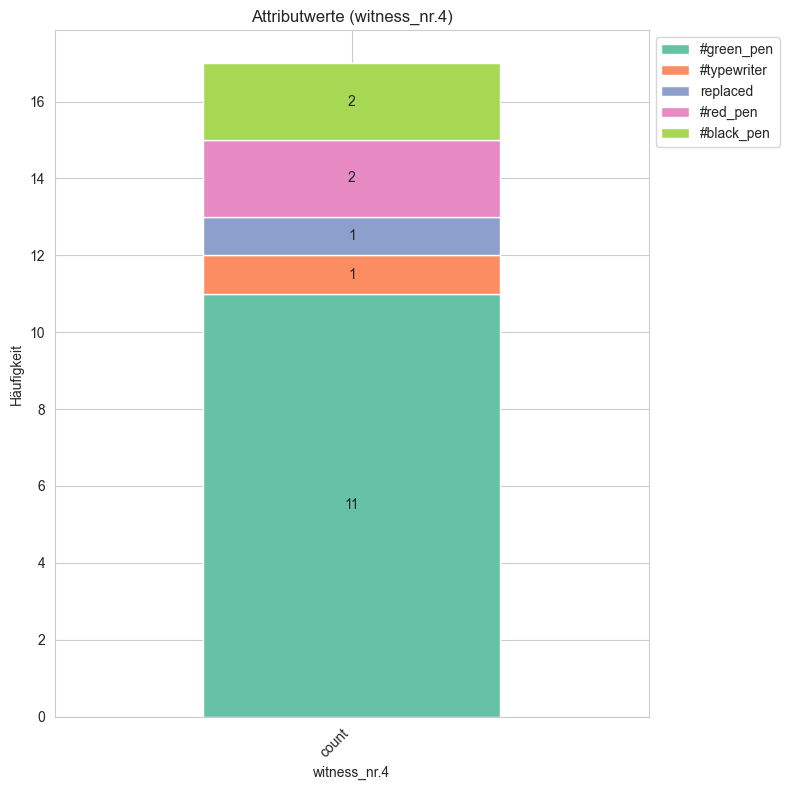

witness_nr.5
     tag - attribute - value  count
0  (del, change, #black_pen)      1
1  (add, change, #black_pen)      3
2  (reg, change, #black_pen)      1
3    (reg, type, rearranged)      2
4  (reg, change, #green_pen)      1


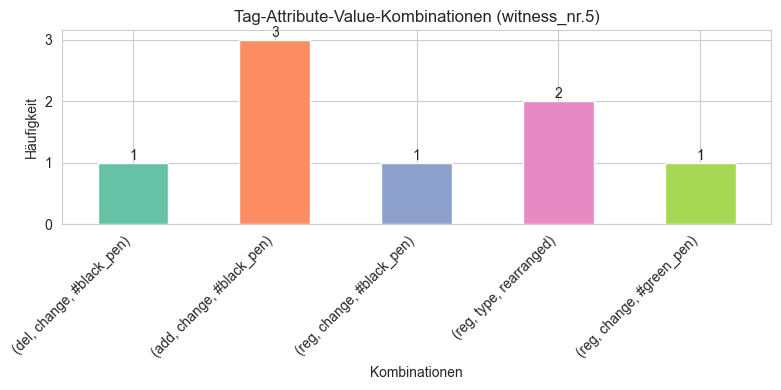

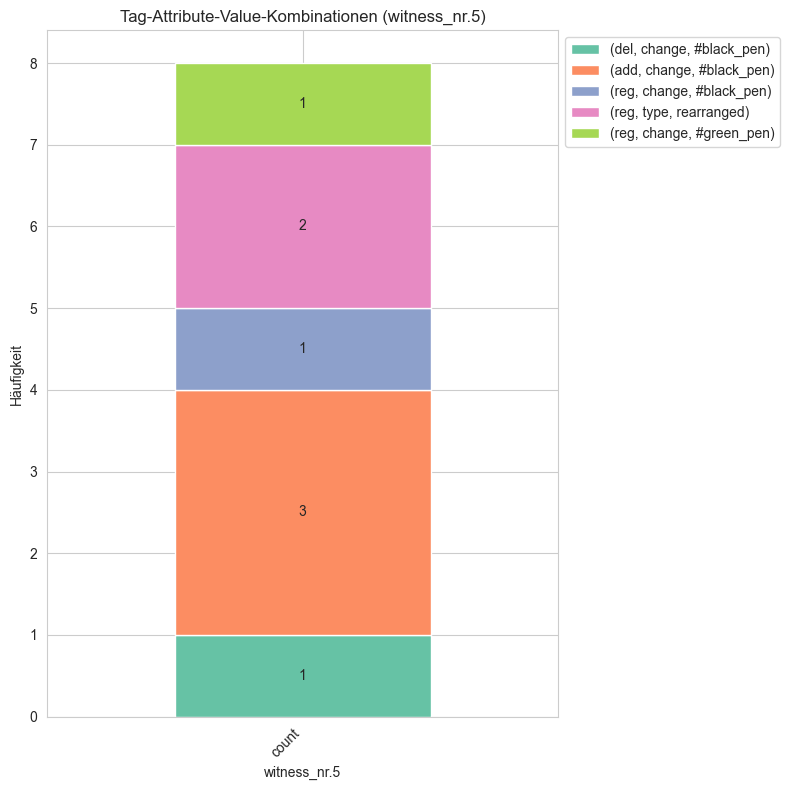

      tag  count
0     del      1
1     add      3
2  choice      1
3    orig      1
4     reg      2


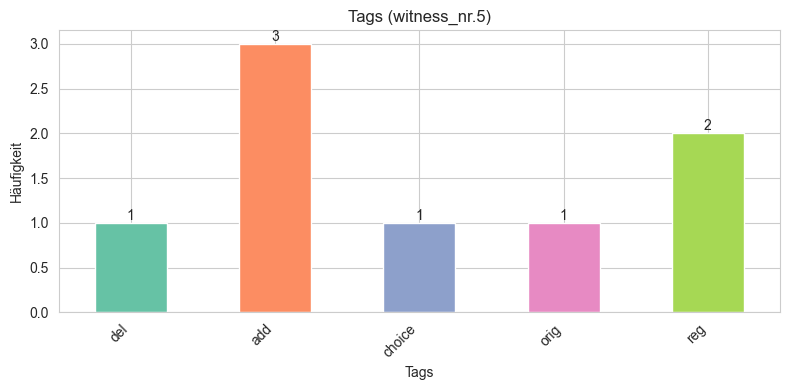

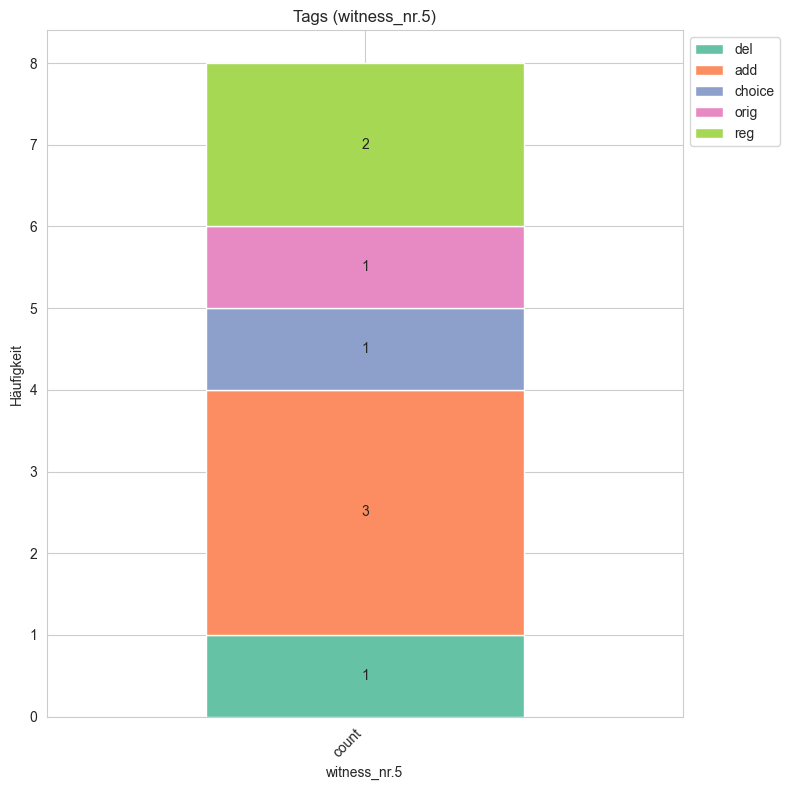

  attribute  count
0    change      6
1      type      2


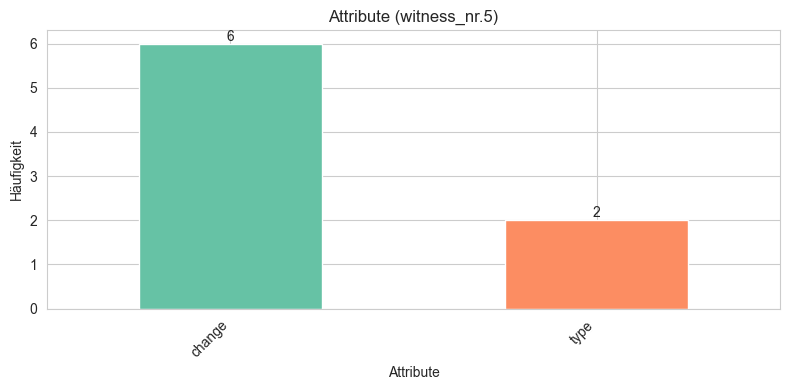

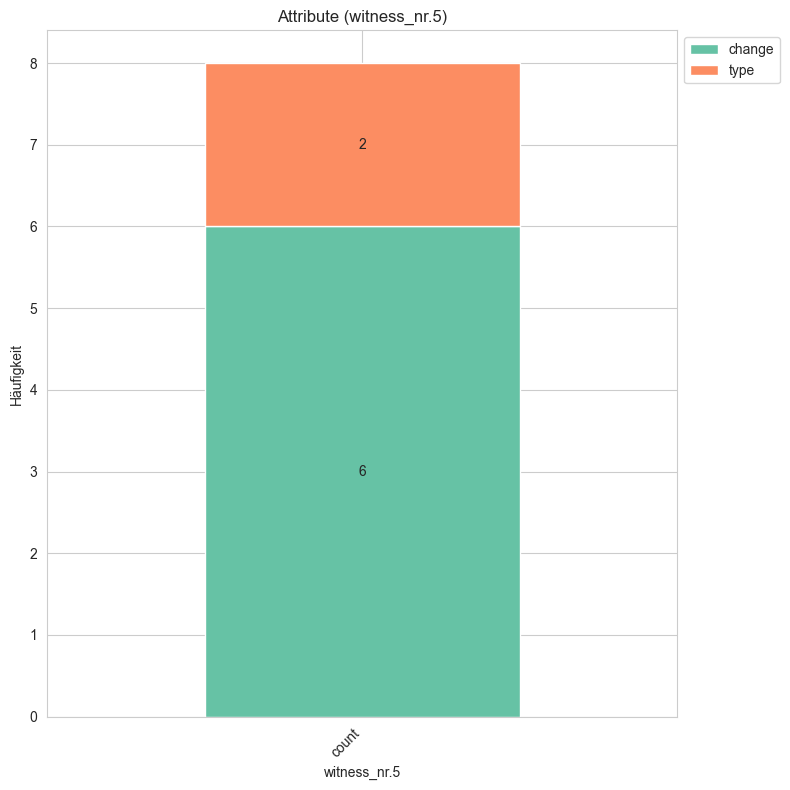

  attribute-value  count
0      #black_pen      5
1      rearranged      2
2      #green_pen      1


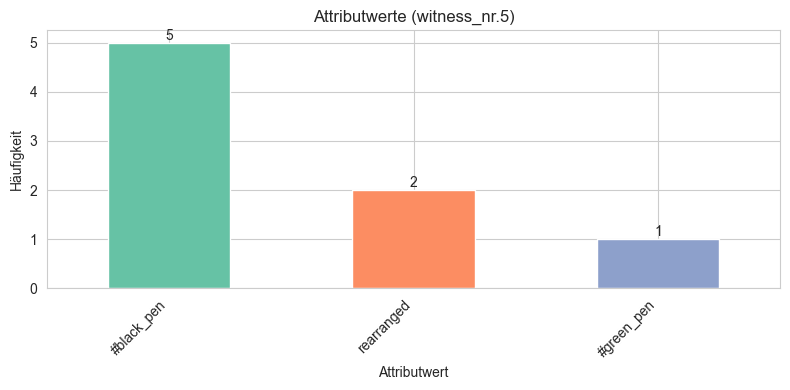

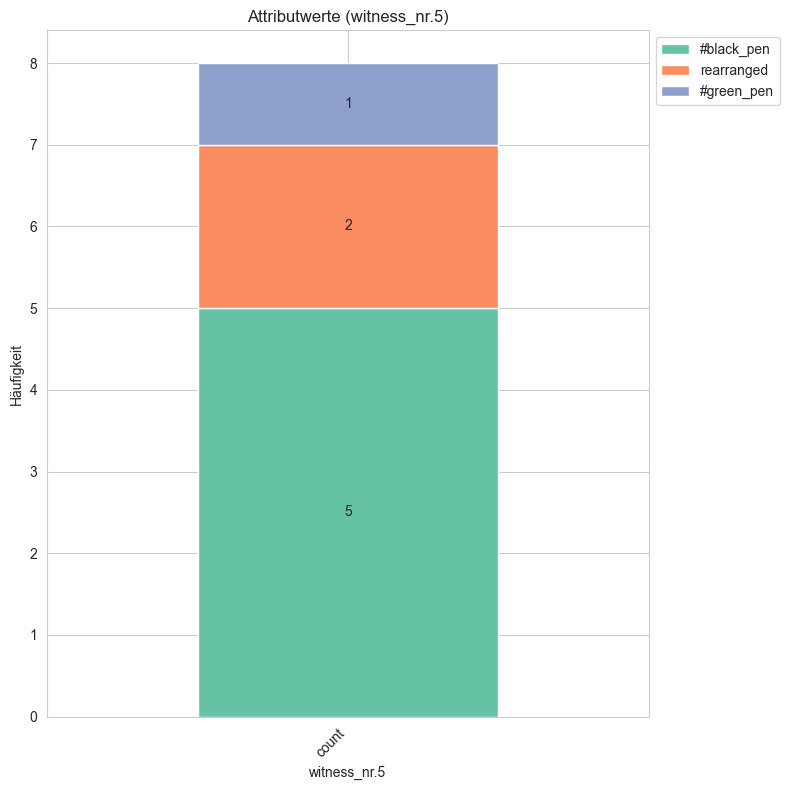

witness_nr.6
     tag - attribute - value  count
0  (add, change, #black_pen)      3
1  (del, change, #black_pen)      3


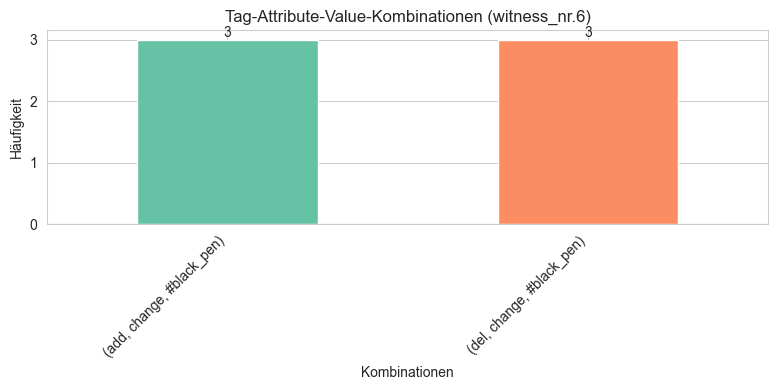

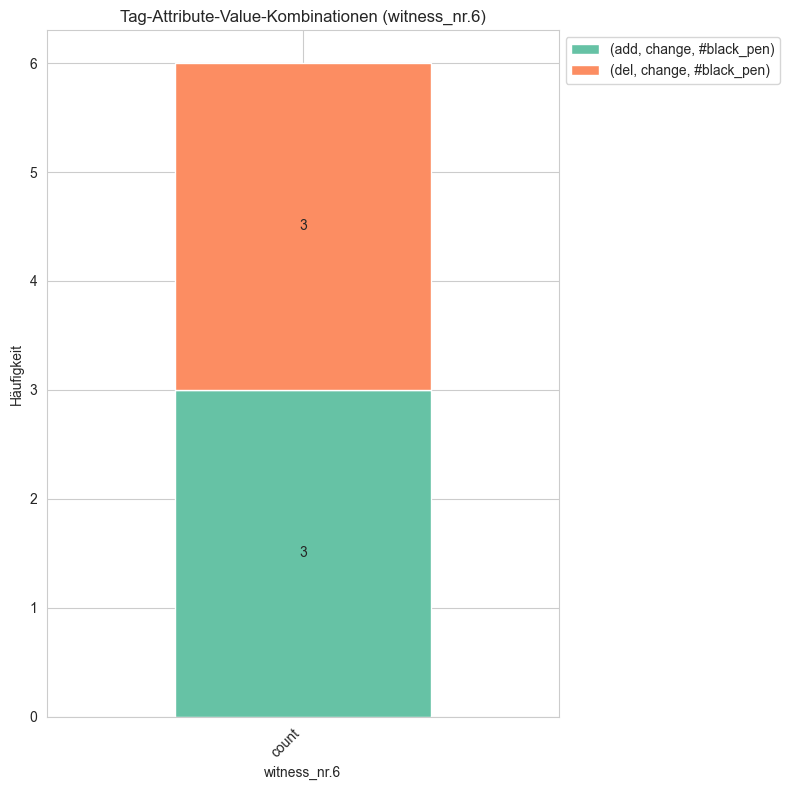

   tag  count
0  add      4
1  del      3


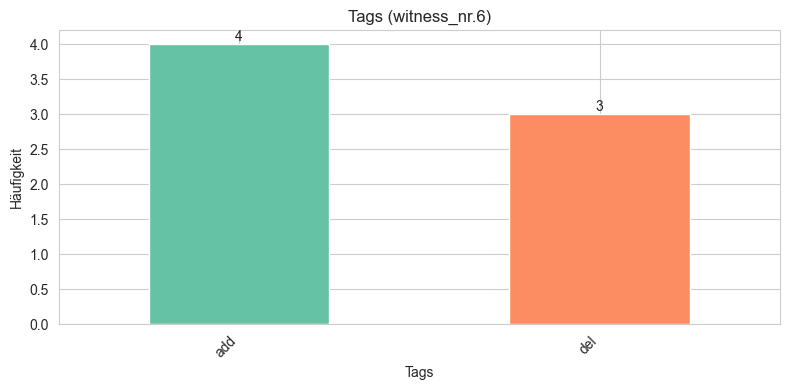

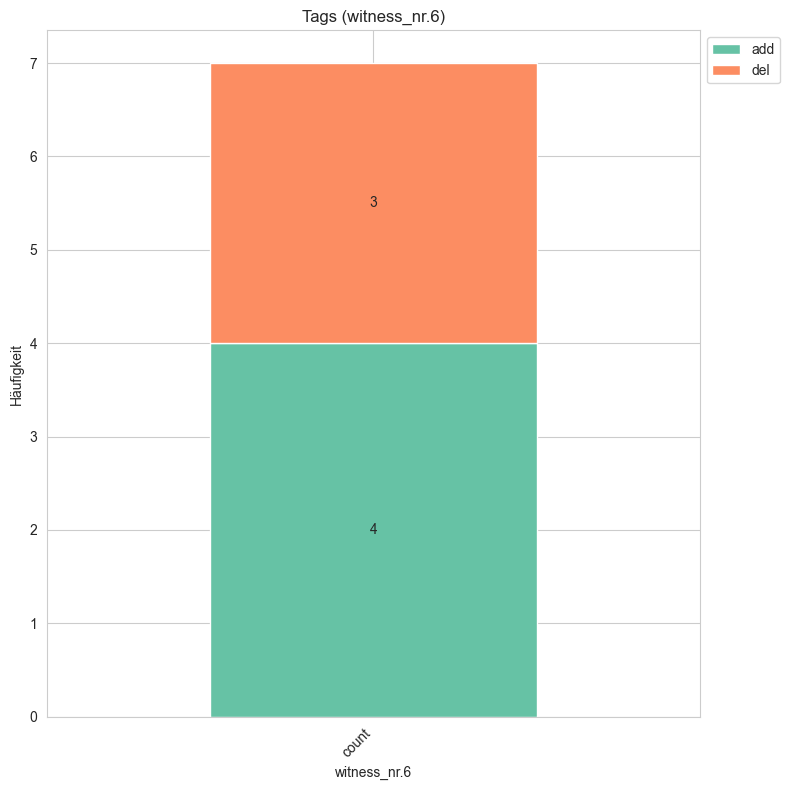

  attribute  count
0    change      6


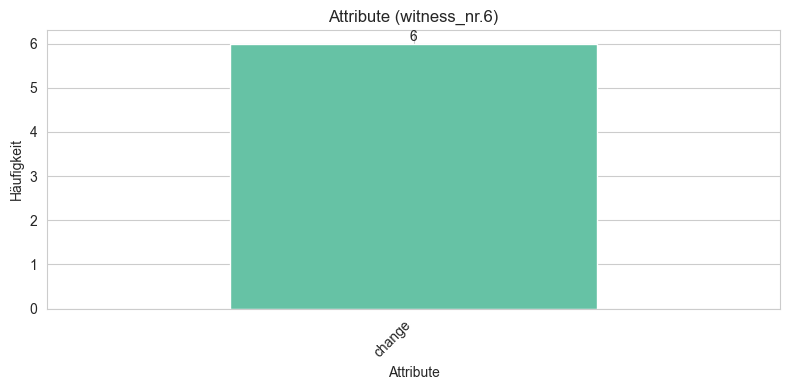

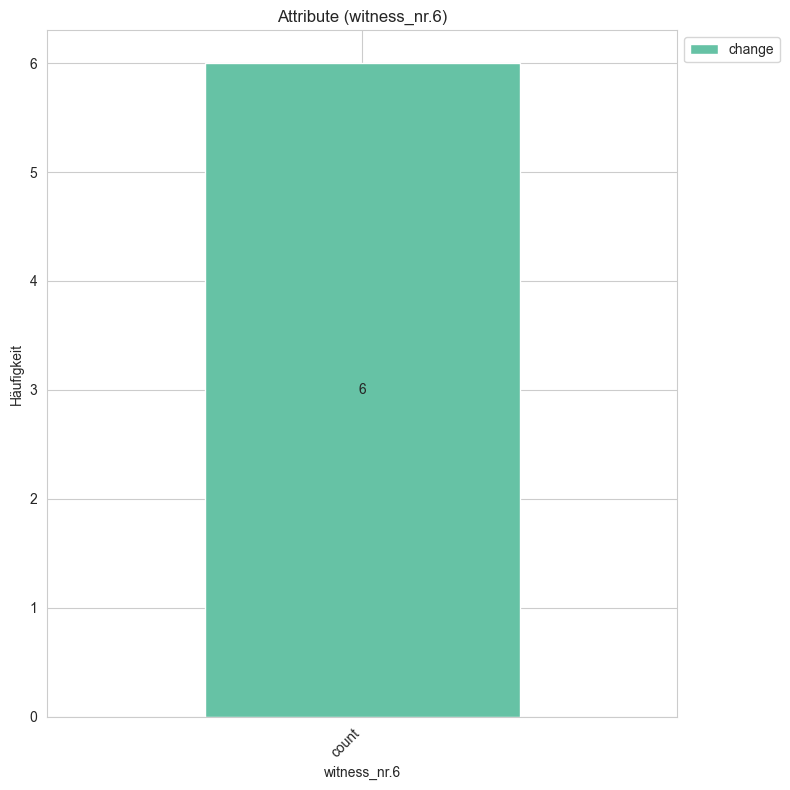

  attribute-value  count
0      #black_pen      6


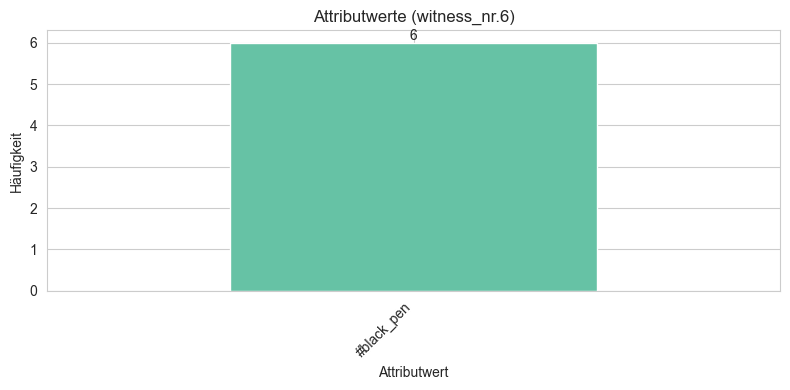

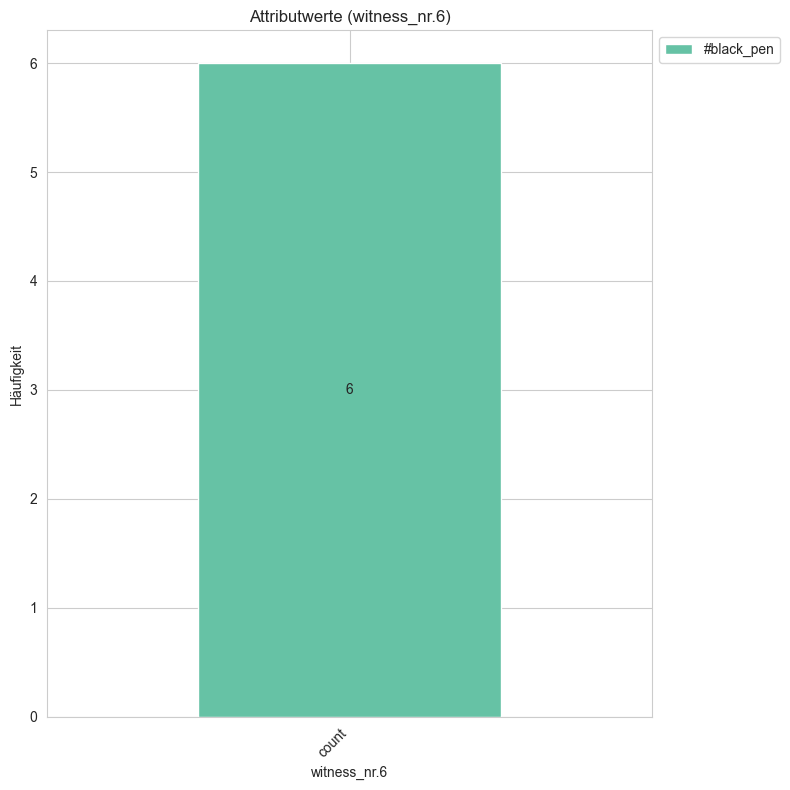

witness_nr.af
     tag - attribute - value  count
0   (add, change, #blue_pen)      7
1   (del, change, #blue_pen)      5
2  (add, change, #black_pen)      1


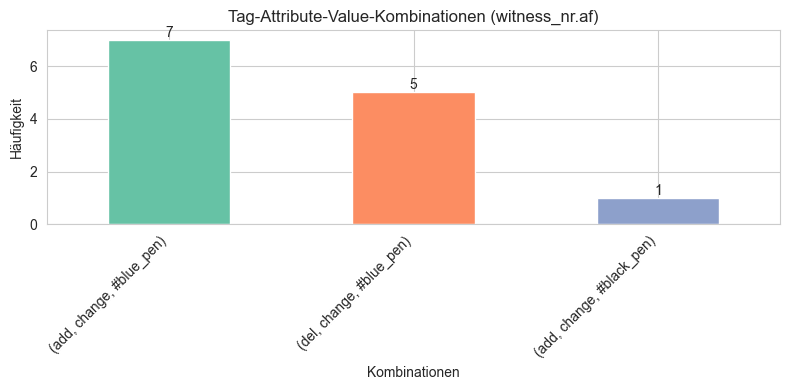

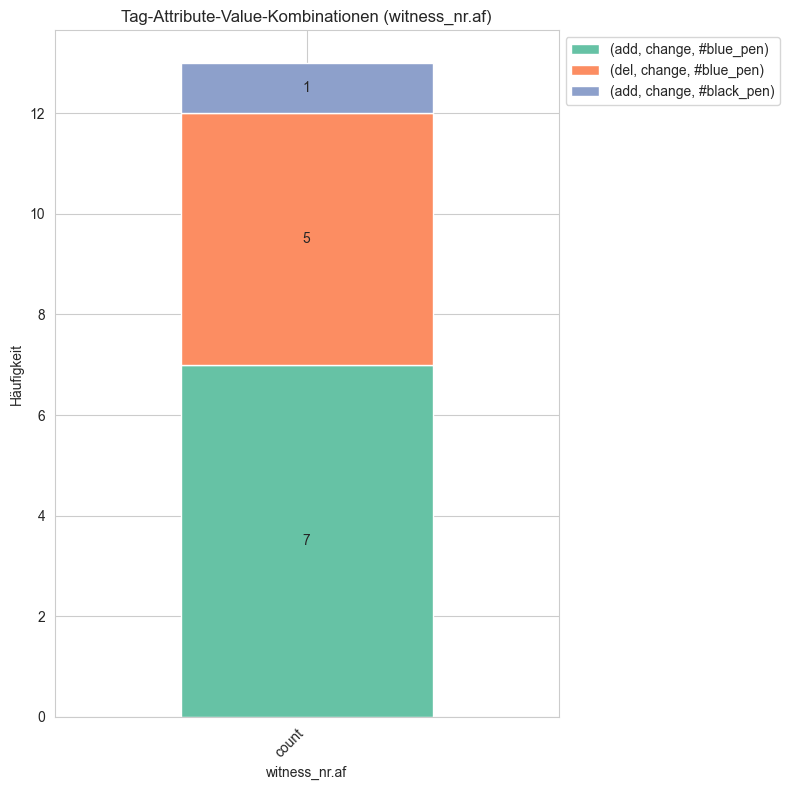

   tag  count
0  add      8
1  del      5


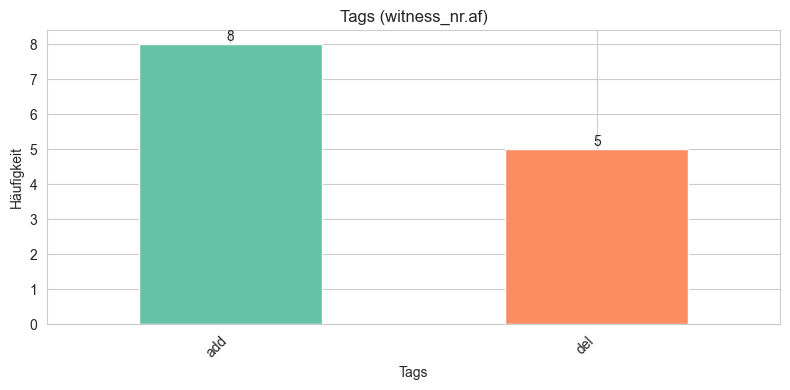

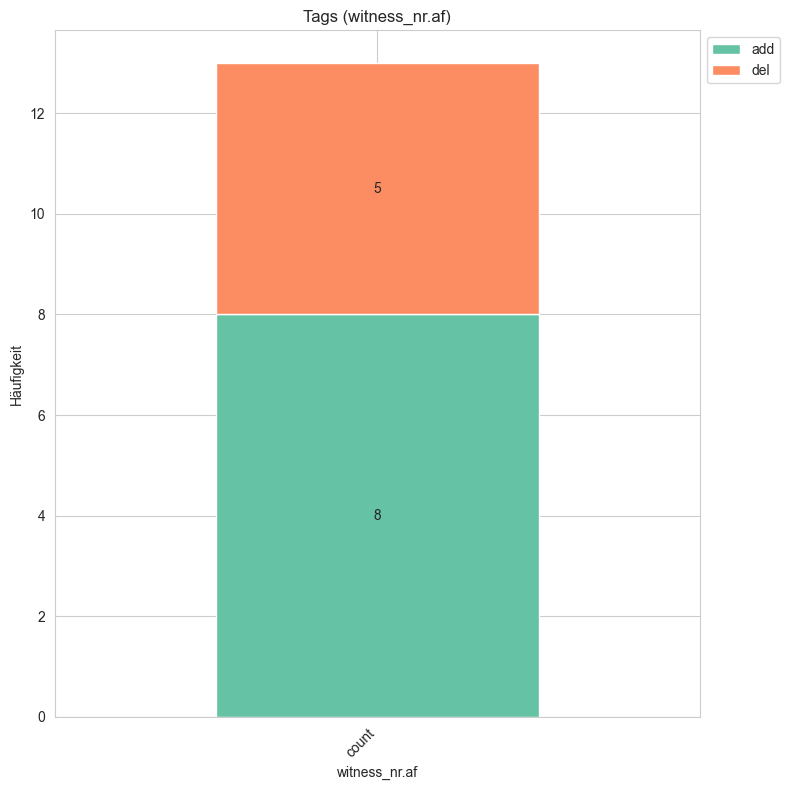

  attribute  count
0    change     13


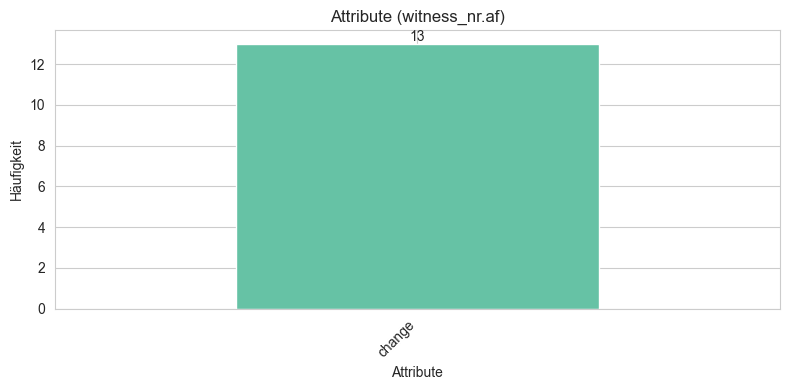

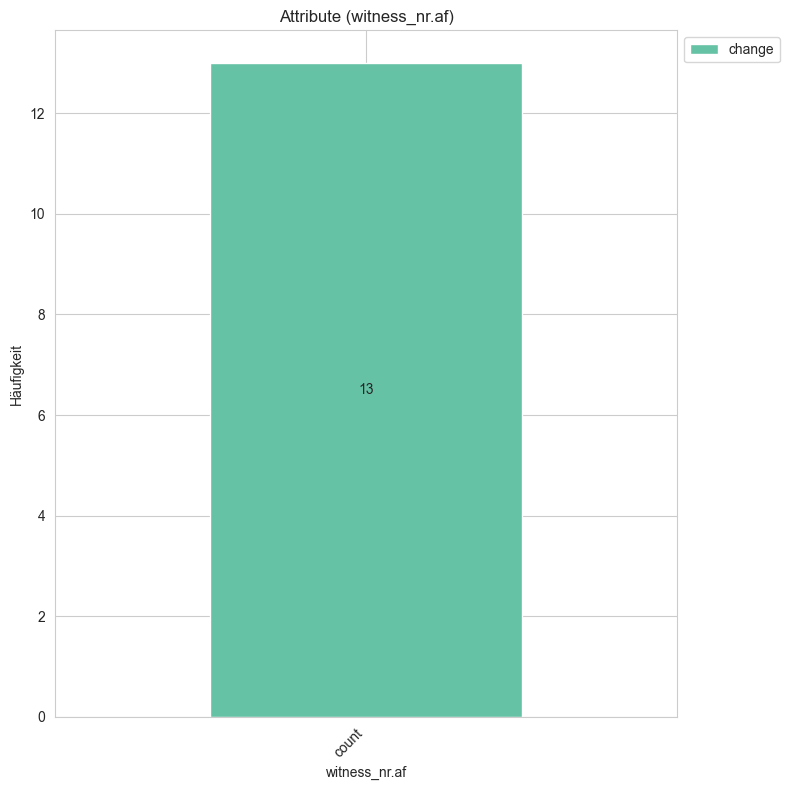

  attribute-value  count
0       #blue_pen     12
1      #black_pen      1


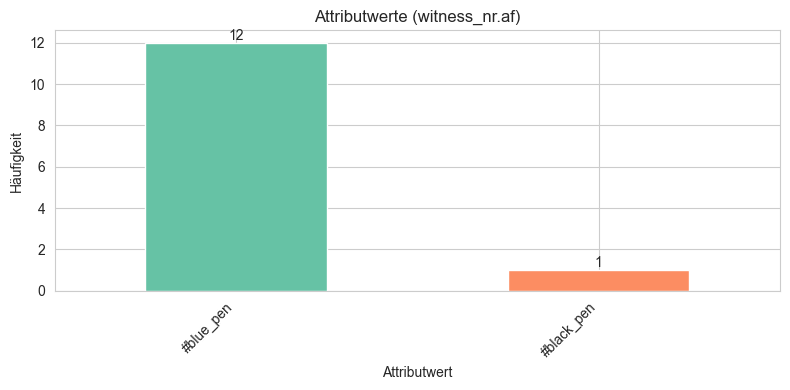

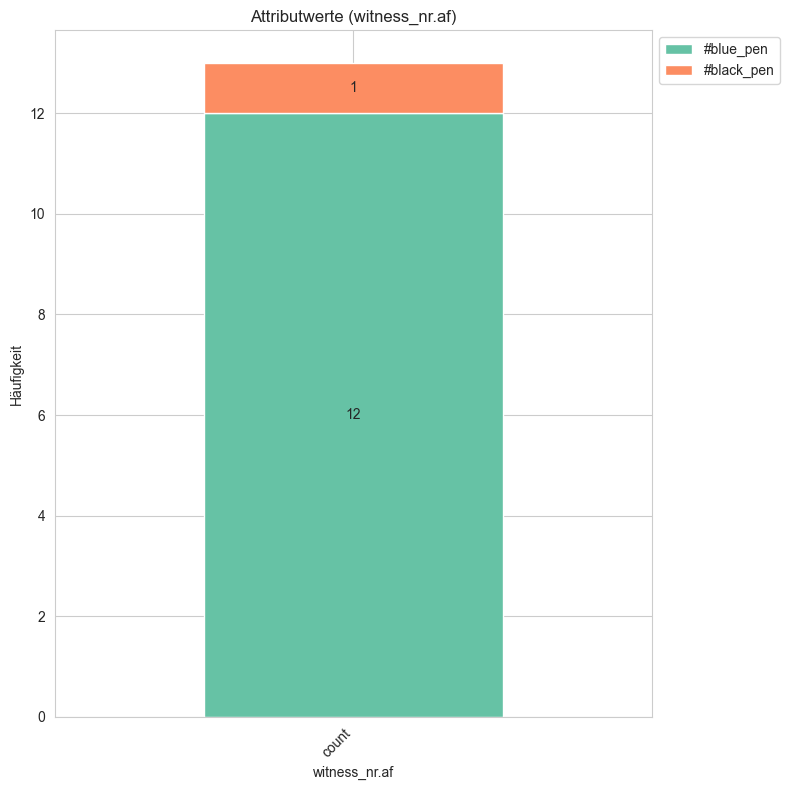

In [317]:
poem = "vwdazb"
divs = tree.xpath("//t:div[@type='poem' and @xml:id='vielleichtweildasAugezuerstbricht']//t:div[@type='witness']", namespaces=ns)

extractallinterferences(poem, divs)

#### Visualisierungen im Vergleich

##### alle Kombinationen (macht nicht unbedingt Sinn, es zu vergleichen, weil es so viele unterschiedliche Kombinationen gibt)

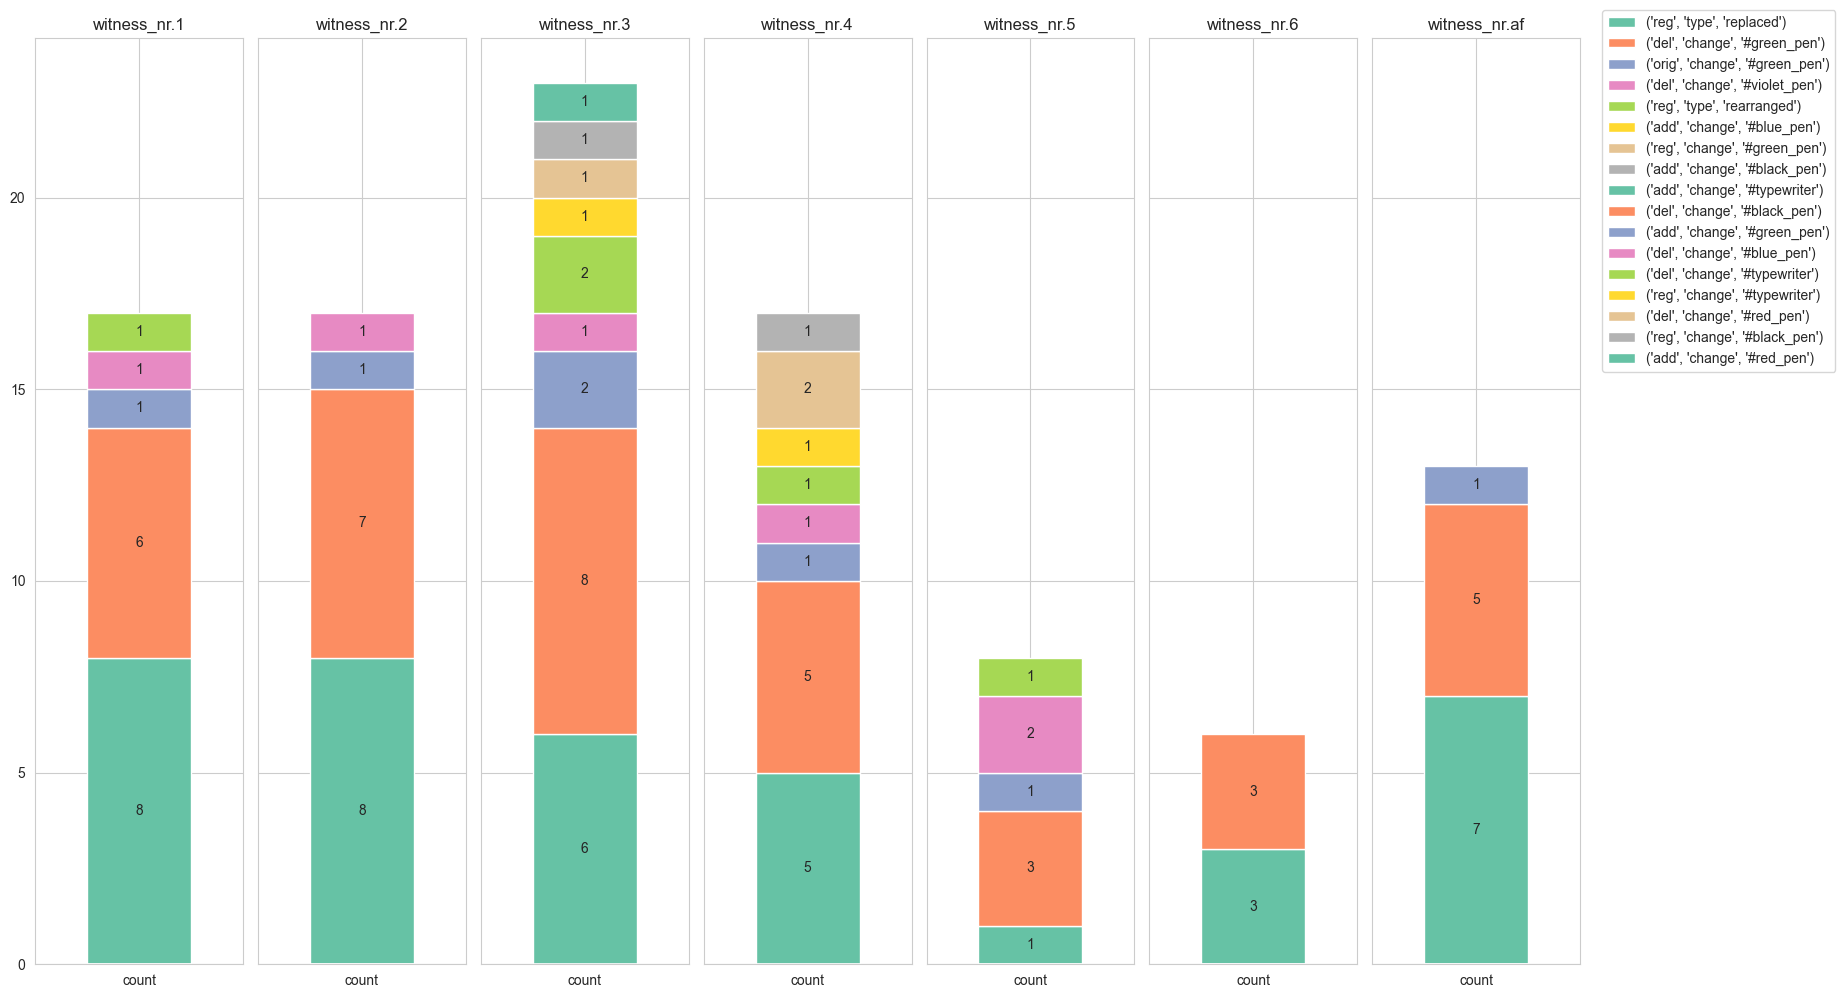

In [321]:
## !!! FUNKTIONIERT; FINAL !!

# Directory containing the CSV files
directory = 'C:/Users/jO/Desktop/DH_MA_Arbeit/coding/vwdazb_revisioninterferences_csvs'

# Filter CSV files based on filename pattern
csv_files = [filename for filename in os.listdir(directory) if filename.startswith('allcombinations') and filename.endswith('.csv')]

# Load CSV files into DataFrames
dfs = {}
for csv_file in csv_files:
    # Extract name for DataFrame
    df_name = csv_file.split('allcombinations_')[-1].split('_df.csv')[0]
    
    # Load CSV into DataFrame
    df = pd.read_csv(os.path.join(directory, csv_file))
    
    # Assign DataFrame to dictionary using extracted name
    dfs[df_name] = df

#Plotting
# Collect all unique categories from all DataFrames
all_categories = set()
for df in dfs.values():
    all_categories.update(df['tag - attribute - value'])

# Create a color palette with the same number of colors as unique categories
palette = sns.color_palette("Set2", n_colors=len(all_categories))

# Create a single plot with one row and as many columns as there are DataFrames
num_dfs = len(dfs)
fig, axes = plt.subplots(1, num_dfs, figsize=(16, 10), sharey=True)

# Initialize handles and labels for legend
legend_handles = []

# Set the threshold value
threshold = 0

# Plot stacked bar charts for each DataFrame
for idx, (df_name, df) in enumerate(dfs.items()):
    ax = axes[idx] if num_dfs > 1 else axes  # Get the appropriate axis
    # Modify DataFrame for stacked bar chart
    stacked_df = df.set_index('tag - attribute - value').T

    # Set missing values for missing categories
    for category in all_categories:
        if category not in stacked_df.columns:
            stacked_df[category] = 0  # Set missing categories to 0

    # Plot stacked bar chart
    stacked_df.plot(kind='bar', stacked=True, color=palette, ax=ax, legend=None)

    # Customize plot
    ax.set_xlabel('')
    ax.set_title(f'{df_name}')
    ax.tick_params(axis='x', rotation=0)

   # Add labels to the bars
    for container in ax.containers:
        labels = [f"{int(val)}" if val > threshold else "" for val in container.datavalues]  # Filter labels based on threshold
        ax.bar_label(container, labels=labels, label_type='center')
    
    # Add handles for legend
    handles, _ = ax.get_legend_handles_labels()
    legend_handles.extend(handles)
    

# Create a common legend outside the subplots
fig.legend(legend_handles, all_categories, bbox_to_anchor=(1, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Save combined plot
plt.savefig('VisVergleich_allcombinations_vwdazb_revisioninterferences.png')

# Show combined plot
plt.show()


##### Alle Tags, die vorkommen

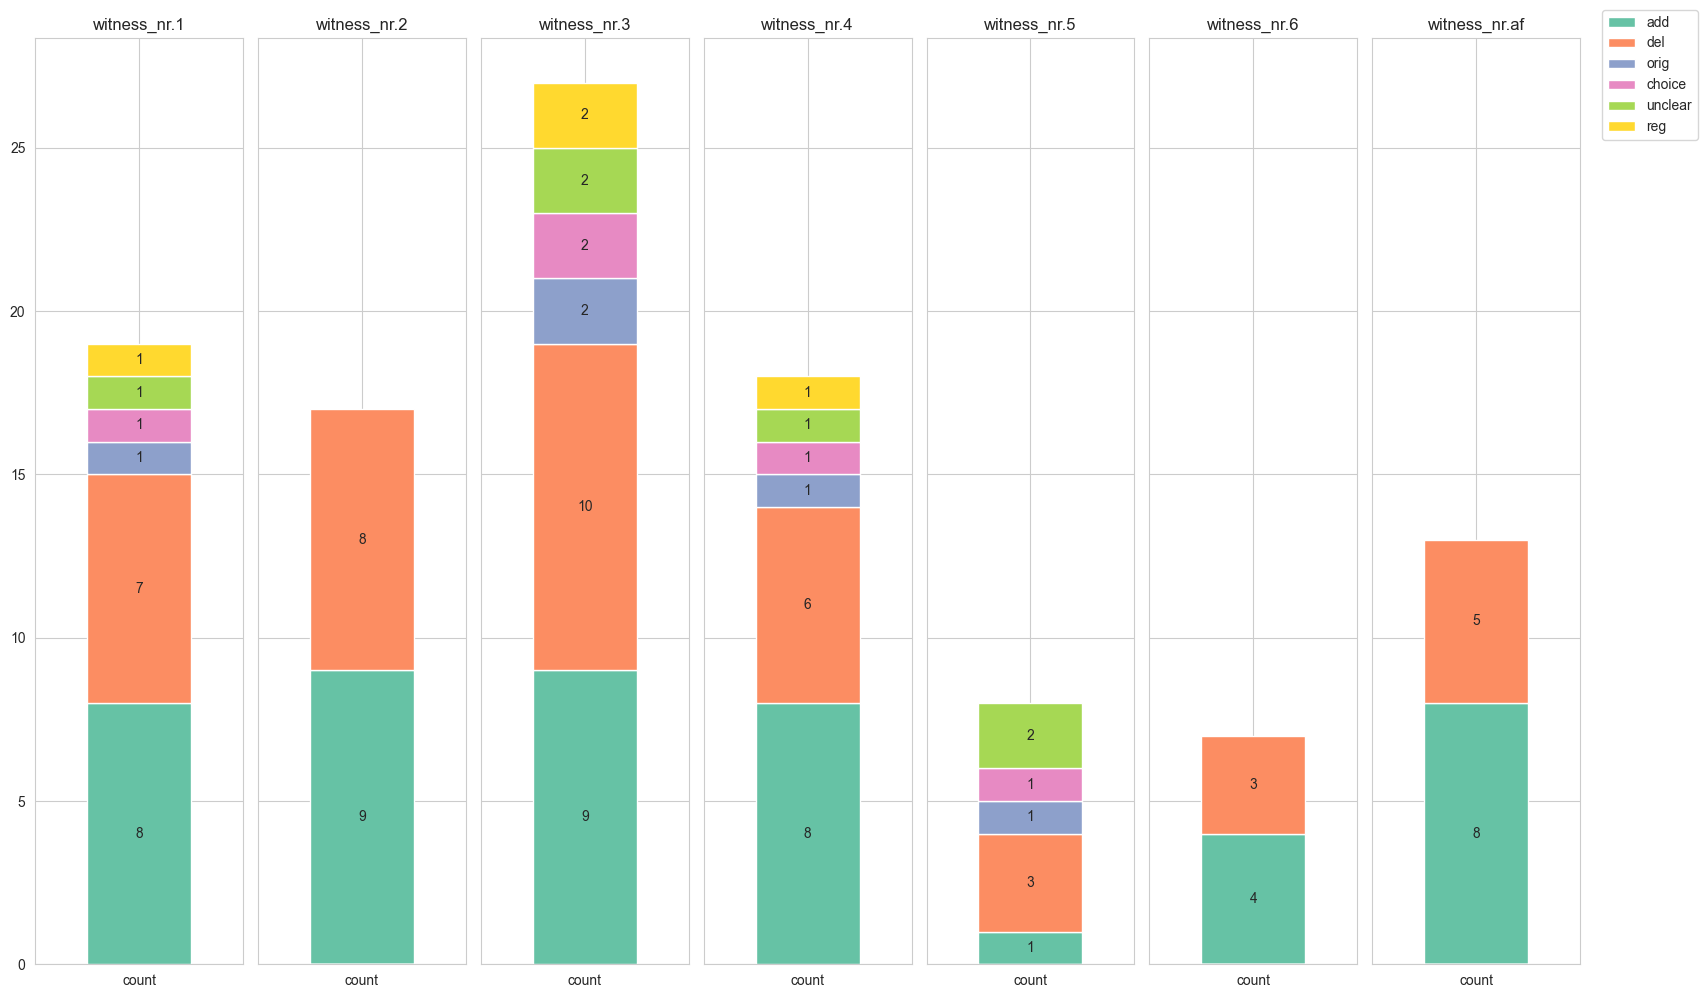

In [320]:

# Directory containing the CSV files
directory = 'C:/Users/jO/Desktop/DH_MA_Arbeit/coding/vwdazb_revisioninterferences_csvs'

# Filter CSV files based on filename pattern
csv_files = [filename for filename in os.listdir(directory) if filename.startswith('alltags') and filename.endswith('.csv')]

# Load CSV files into DataFrames
dfs = {}
for csv_file in csv_files:
    # Extract name for DataFrame
    df_name = csv_file.split('alltags_')[-1].split('_df.csv')[0]
    
    # Load CSV into DataFrame
    df = pd.read_csv(os.path.join(directory, csv_file))
    
    # Assign DataFrame to dictionary using extracted name
    dfs[df_name] = df


# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Collect all unique categories from all DataFrames
all_categories = set()
for df in dfs.values():
    all_categories.update(df['tag'])

# Create a color palette with the same number of colors as unique categories
palette = sns.color_palette("Set2", n_colors=len(all_categories))

# Create a single plot with one row and as many columns as there are DataFrames
num_dfs = len(dfs)
fig, axes = plt.subplots(1, num_dfs, figsize=(16, 10), sharey=True)

# Initialize handles and labels for legend
legend_handles = []

# Set the threshold value
threshold = 0

# Plot stacked bar charts for each DataFrame
for idx, (df_name, df) in enumerate(dfs.items()):
    ax = axes[idx] if num_dfs > 1 else axes  # Get the appropriate axis
    # Modify DataFrame for stacked bar chart
    stacked_df = df.set_index('tag').T

    # Set missing values for missing categories
    for category in all_categories:
        if category not in stacked_df.columns:
            stacked_df[category] = 0  # Set missing categories to 0

    # Plot stacked bar chart
    stacked_df.plot(kind='bar', stacked=True, color=palette, ax=ax, legend=None)

    # Customize plot
    ax.set_xlabel('')
    ax.set_title(f'{df_name}')
    ax.tick_params(axis='x', rotation=0)

   # Add labels to the bars
    for container in ax.containers:
        labels = [f"{int(val)}" if val > threshold else "" for val in container.datavalues]  # Filter labels based on threshold
        ax.bar_label(container, labels=labels, label_type='center')
    
    # Add handles for legend
    handles, _ = ax.get_legend_handles_labels()
    legend_handles.extend(handles)
    

# Create a common legend outside the subplots
fig.legend(legend_handles, all_categories, bbox_to_anchor=(1, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Save combined plot
plt.savefig('VisVergleich_alltags_vwdazb_revisioninterferences.png')

# Show combined plot
plt.show()


##### Alle Attribute, die vorkommen

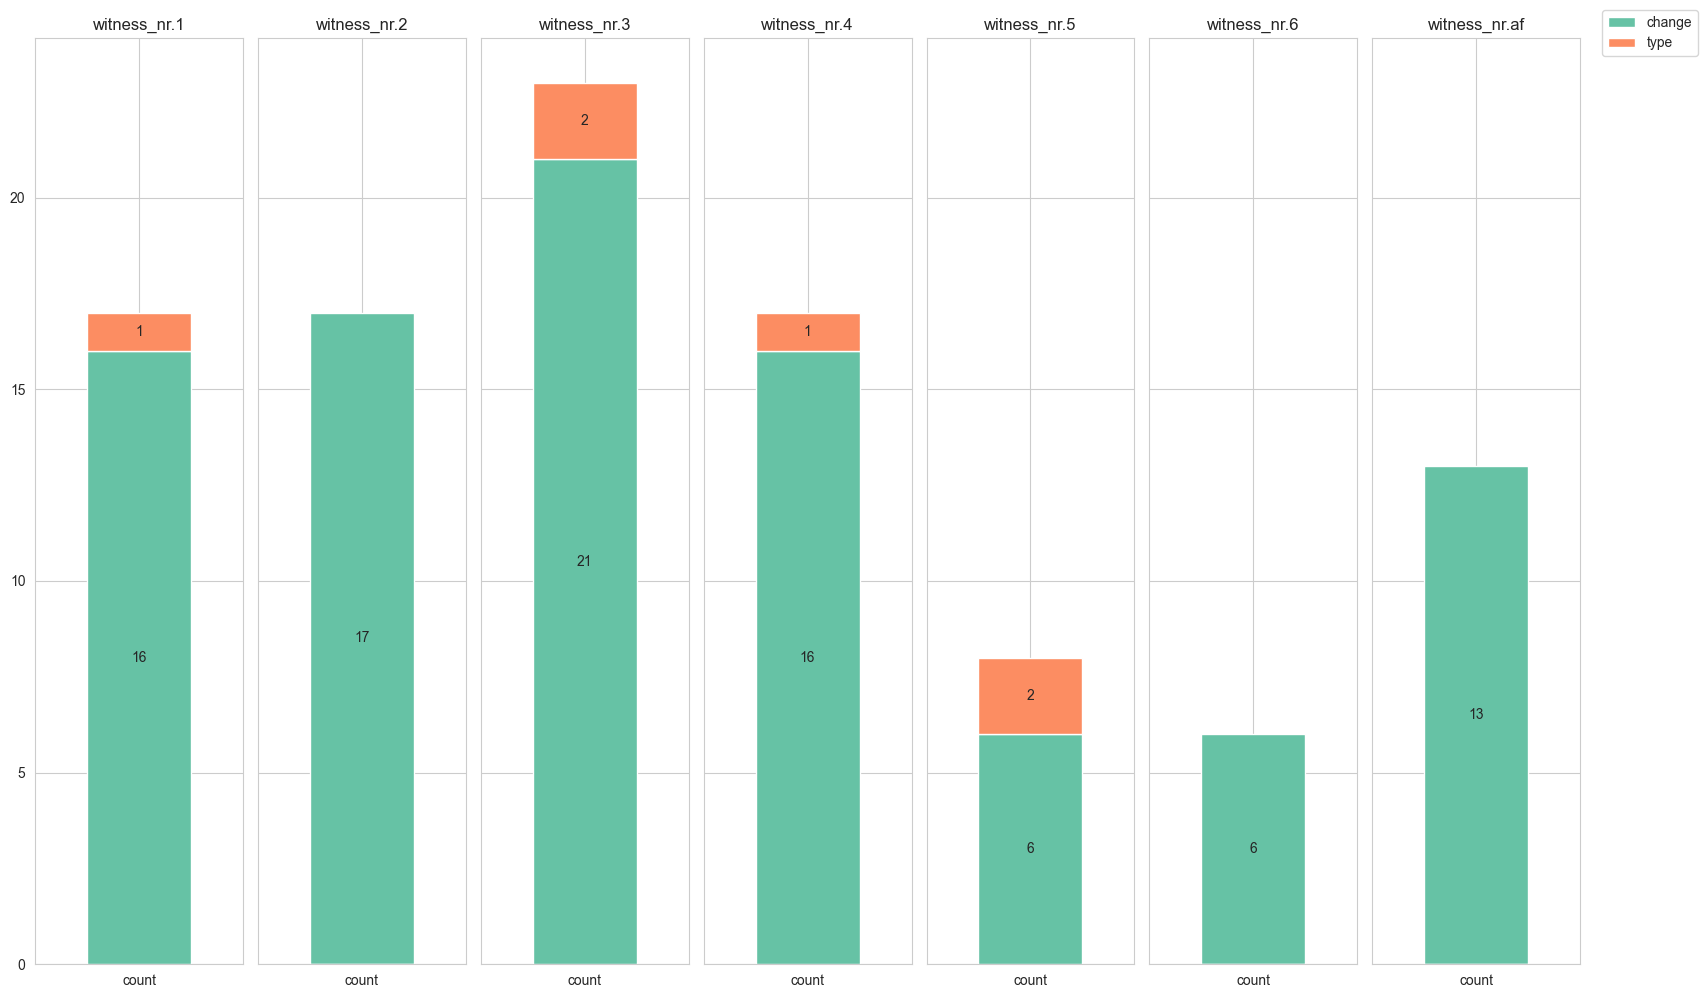

In [331]:
# Directory containing the CSV files
directory = 'C:/Users/jO/Desktop/DH_MA_Arbeit/coding/vwdazb_revisioninterferences_csvs'

# Filter CSV files based on filename pattern
csv_files = [filename for filename in os.listdir(directory) if filename.startswith('onlyattributes') and filename.endswith('.csv')]

# Load CSV files into DataFrames
dfs = {}
for csv_file in csv_files:
    # Extract name for DataFrame
    df_name = csv_file.split('onlyattributes_')[-1].split('_df.csv')[0]
    
    # Load CSV into DataFrame
    df = pd.read_csv(os.path.join(directory, csv_file))
    
    # Assign DataFrame to dictionary using extracted name
    dfs[df_name] = df


# Plotting

# Alle uniquen Kategorien sammeln
#all_categories = set()
#for df in dfs.values():
   # all_categories.update(df['attribute'])
all_categories = ('change', 'type') # hier manuell geändert, weil die Labels/Farben/Kategorien genau verkehrt herum waren (=falsch: change orange)

# Palette nach Anzahl der Kategorien
palette = sns.color_palette("Set2", n_colors=len(all_categories))

# Plot mit 1 Reihe und Spalten nach Anzahl der DFs
num_dfs = len(dfs)
fig, axes = plt.subplots(1, num_dfs, figsize=(16, 10), sharey=True)

# handles und labels für Legende
legend_handles = []

# threshold für angezeigte Labels in den Bars
threshold = 0

# Plot für stacked bar charts pro DataFrame
for idx, (df_name, df) in enumerate(dfs.items()):
    ax = axes[idx] if num_dfs > 1 else axes  # Get the appropriate axis
    # Modify DataFrame for stacked bar chart
    stacked_df = df.set_index('attribute').T

    # missing values von missing categories auf 0 setzen, wenn sie nicht vorhanden sind in einem DF, in anderen aber schon
    for category in all_categories:
        if category not in stacked_df.columns:
            stacked_df[category] = 0  # Set missing categories to 0

    # Plot stacked bar chart
    stacked_df.plot(kind='bar', stacked=True, color=palette, ax=ax, legend=None)

    # Labels, Titel, tick
    ax.set_xlabel('')
    ax.set_title(f'{df_name}')
    ax.tick_params(axis='x', rotation=0)

   # Labels in den Bars
    for container in ax.containers:
        labels = [f"{int(val)}" if val > threshold else "" for val in container.datavalues]  # Filter labels based on threshold
        ax.bar_label(container, labels=labels, label_type='center')
    
    # handles für Legende
    handles, _ = ax.get_legend_handles_labels()
    legend_handles.extend(handles)
    

# Legend außerhalb der Subpolts
fig.legend(legend_handles, all_categories, bbox_to_anchor=(1, 1), loc='upper left')

# Layout, damit nichts abgeschnitten wird
plt.tight_layout()

# Speichern
plt.savefig('VisVergleich_onlyattributes_vwdazb_revisioninterferences.png')

# Show
plt.show()


##### Attributwerte

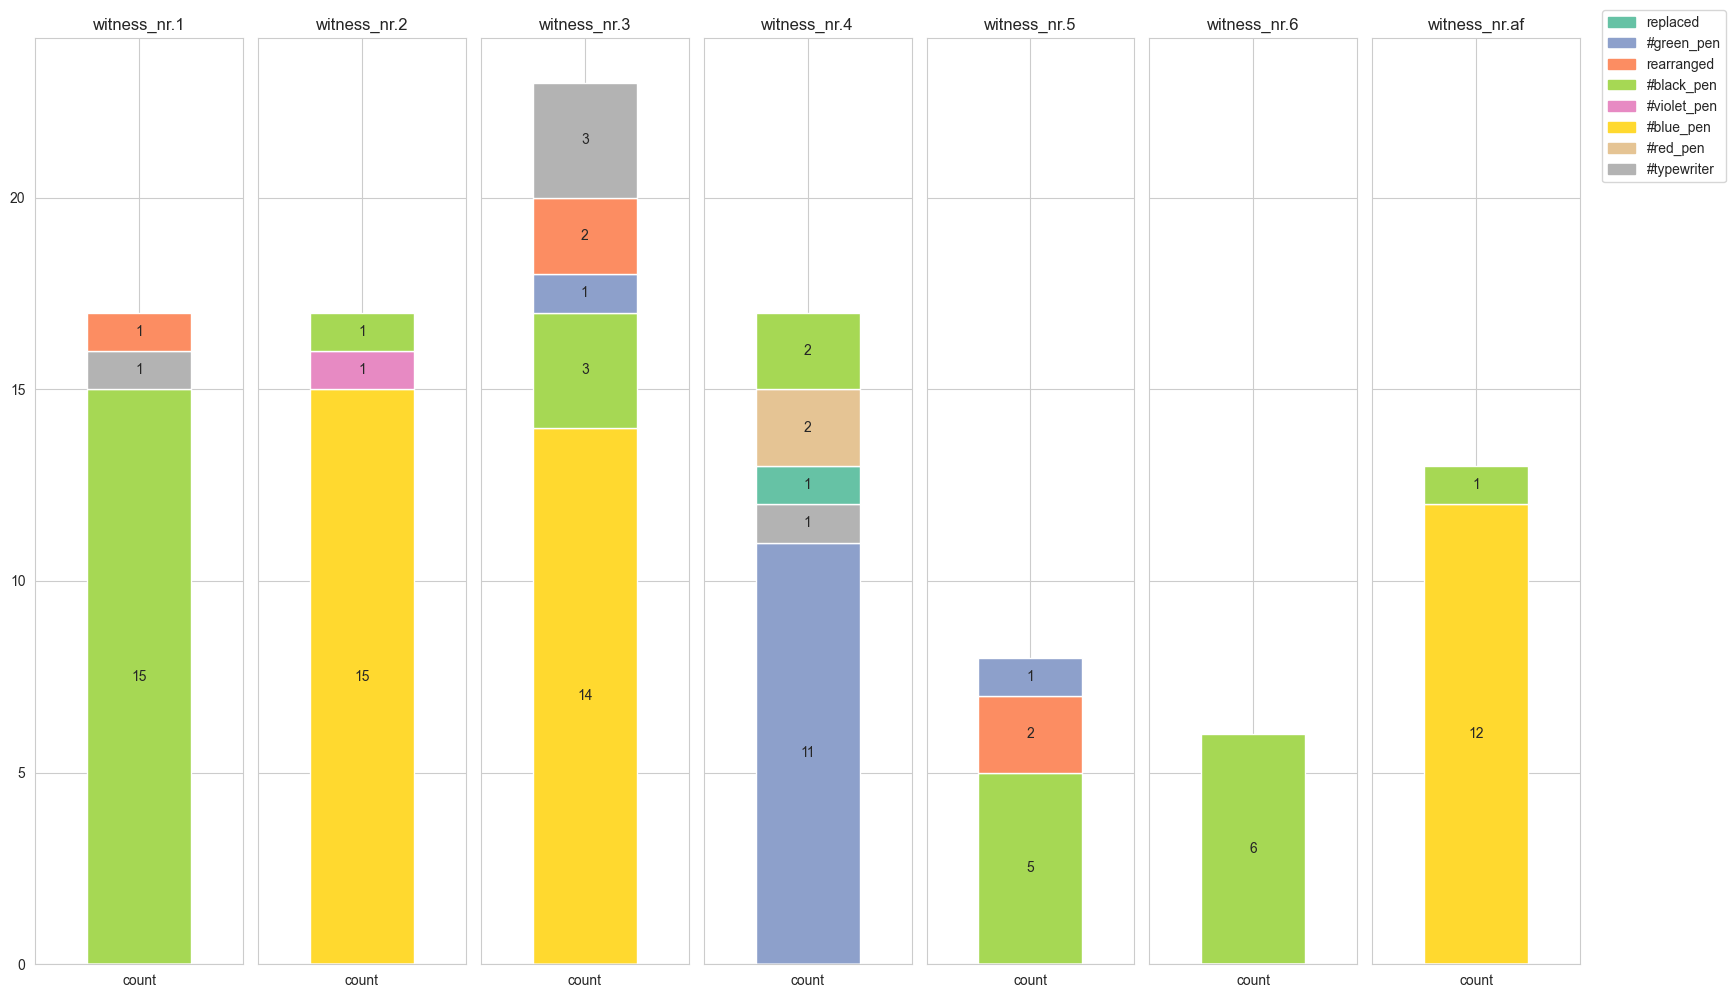

In [346]:
####FUNKTIONIERT davor: PROBLEM: NICHT ALLE KATEGORIEN WERDEN ANGEZEIGT / KEINE AHNUNG WARUM (jetzt für alle darüber ändern!!!)


# Directory containing the CSV files
directory = 'C:/Users/jO/Desktop/DH_MA_Arbeit/coding/vwdazb_revisioninterferences_csvs'

# Filter CSV files based on filename pattern
csv_files = [filename for filename in os.listdir(directory) if filename.startswith('onlyvalues') and filename.endswith('.csv')]

# Load CSV files into DataFrames
dfs = {}
for csv_file in csv_files:
    # Extract name for DataFrame
    df_name = csv_file.split('onlyvalues_')[-1].split('_df.csv')[0]
    
    # Load CSV into DataFrame
    df = pd.read_csv(os.path.join(directory, csv_file))
    
    # Assign DataFrame to dictionary using extracted name
    dfs[df_name] = df


# Plotting
import matplotlib.patches as mpatches

# Collect all unique categories from all DataFrames
all_categories = set()
for df in dfs.values():
    all_categories.update(df['attribute-value'])

# Create a color palette with the same number of colors as unique categories
palette = sns.color_palette("Set2", n_colors=len(all_categories))

# Create a dictionary to map categories to colors
category_color_map = dict(zip(all_categories, palette))

# Create a dictionary to map unique categories to labels
label_map = {category: category.split("-")[0] for category in all_categories}

# Create a single plot with one row and as many columns as there are DataFrames
num_dfs = len(dfs)
fig, axes = plt.subplots(1, num_dfs, figsize=(16, 10), sharey=True)

# Initialize handles and labels for legend
legend_handles = []
legend_labels = set()  # Set to track unique legend labels

# Set the threshold value
threshold = 0

# Plot stacked bar charts for each DataFrame
for idx, (df_name, df) in enumerate(dfs.items()):
    ax = axes[idx] if num_dfs > 1 else axes  # Get the appropriate axis
    # Modify DataFrame for stacked bar chart
    stacked_df = df.set_index('attribute-value').T

    # Set missing values for missing categories
    for category in all_categories:
        if category not in stacked_df.columns:
            stacked_df[category] = 0  # Set missing categories to 0
    
    # Plot stacked bar chart with correct colors
    stacked_df.plot(kind='bar', stacked=True, color=[category_color_map[cat] for cat in stacked_df.columns], ax=ax, legend=None)

    # Customize plot
    ax.set_xlabel('')
    ax.set_title(f'{df_name}')
    ax.tick_params(axis='x', rotation=0)

    # Add labels to the bars
    for container in ax.containers:
        labels = [f"{int(val)}" if val > threshold else "" for val in container.datavalues]  # Filter labels based on threshold
        ax.bar_label(container, labels=labels, label_type='center')
    
    # Add handles for legend
    unique_categories = set(stacked_df.columns)
    for category in unique_categories:
        if category not in legend_labels:  # Avoid redundant labels
            legend_handles.append(mpatches.Patch(color=category_color_map[category], label=label_map[category]))
            legend_labels.add(category)  # Add category to the set of legend labels

# Create a common legend outside the subplots
fig.legend(handles=legend_handles, bbox_to_anchor=(1, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Save combined plot
plt.savefig('VisVergleich_onlyvalues_vwdazb_revisioninterferences.png')

# Show combined plot
plt.show()




### Analyse der POS-Verteilung in den extrahierten Textstufen

In [ ]:
df.to_csv(f'{foldername}/Token-POS_extrahierte_revision_{divtype}_df.csv', index=False)